<div id="container" style="position:relative;">
<div style="float:left"><h1> Bakery Data EDA - Abi Magnall </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://twomagpiesbakery.co.uk/wp-content/uploads/2020/11/logo-no-site.jpg" />
</div>
</div>

The purpose of this EDA notebook is to explore and identify any anomalies and trends that exist in the data. Through this exploration the aim is to develop a hypothesis of independent variables that should be incldued in the modelling phase to accurately forecast the Revenue and certain Product Sales Quantities. 

- The identified trends could be general trends overtime, seasonal or against the independent variables selected of `Day`, `TAVG`, `PRCP`, `CPI_Electricity` and `CPI_Food`. 


## Importing Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
import time
import os
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Importing Custom Functions

In [2]:
import BakeryFunctions as bakery

## Get Working Directory

In [3]:
working_directory = os.getcwd()
working_directory

'/Users/abimagnall/Documents/BrainStation/Capstone/Data'

## Importing Preprocessed Dataset

In [14]:
aldeburgh = pd.read_csv(working_directory+'/3_preprocessed_data/aldeburgh_preprocessed.csv')
display(aldeburgh.head())
southwold = pd.read_csv(working_directory+'/3_preprocessed_data/southwold_preprocessed.csv')
display(southwold.head())
darsham = pd.read_csv(working_directory+'/3_preprocessed_data/darsham_preprocessed.csv')
display(darsham.head())
norwich = pd.read_csv(working_directory+'/3_preprocessed_data/norwich_preprocessed.csv')
display(norwich.head())
product_list = pd.read_csv(working_directory+'/2_clean_data/CleanProducts.csv', index_col=0)
display(product_list.head())

TransactionId  ProductId  UnitPrice  Quantity  DiscountAmount  \
0      325410032    1677392        2.1         2             0.0   
1      325358300    1677412        2.1         2             0.0   
2      325358300   11948094        1.8         1             0.0   
3      325358334    1677449        2.1         1             0.0   
4      325358334   21644677        7.8         1             0.0   

   DiscountReasonId  RefundReasonId        Date  Revenue  
0               0.0             0.0  2020-09-01      4.2  
1               0.0             0.0  2020-09-01      4.2  
2               0.0             0.0  2020-09-01      1.8  
3               0.0             0.0  2020-09-01      2.1  
4               0.0             0.0  2020-09-01      7.8

TransactionId  ProductId  UnitPrice  Quantity  DiscountAmount  \
0      368108160    1677386       2.60         1             0.0   
1      368116614    1677402       2.85         1             0.0   
2      368121026    1677395       2.70         1             0.0   
3      368121026    9262077       2.40         1             0.0   
4      368121026    1677551       2.00         1             0.0   

   DiscountReasonId  RefundReasonId        Date  Revenue  
0               0.0             0.0  2021-07-01     2.60  
1               0.0             0.0  2021-07-01     2.85  
2               0.0             0.0  2021-07-01     2.70  
3               0.0             0.0  2021-07-01     2.40  
4               0.0             0.0  2021-07-01     2.00

TransactionId  ProductId  UnitPrice  Quantity  DiscountAmount  \
0      368107752    1677554        2.2         1             0.0   
1      368107752    1677387        2.9         1             0.0   
2      368107986    1677480        3.9         1             0.0   
3      368107986    7243504        2.5         1             0.0   
4      368107986    1677539        1.7         1             0.0   

   DiscountReasonId  RefundReasonId        Date  Revenue  
0               0.0             0.0  2021-07-01      2.2  
1               0.0             0.0  2021-07-01      2.9  
2               0.0             0.0  2021-07-01      3.9  
3               0.0             0.0  2021-07-01      2.5  
4               0.0             0.0  2021-07-01      1.7

TransactionId  ProductId  UnitPrice  Quantity  DiscountAmount  \
0      368106886   17865562       2.50         1             0.0   
1      368106886    1677415       2.30         1             0.0   
2      368106886    1677402       2.85         1             0.0   
3      368107620    1677426       2.90         1             0.0   
4      368107620    1677674       3.20         1             0.0   

   DiscountReasonId  RefundReasonId        Date  Revenue  
0               0.0             0.0  2021-07-01     2.50  
1               0.0             0.0  2021-07-01     2.30  
2               0.0             0.0  2021-07-01     2.85  
3               0.0             0.0  2021-07-01     2.90  
4               0.0             0.0  2021-07-01     3.20

Name  ProductId
0     PORRIDGE T/O    1677377
1     PORRIDGE E/I    1677378
2  TOAST & JAM E/I    1677384
3    LATTE REG T/O    1677386
4  LATTE LARGE T/O    1677387

In [15]:
# aldeburgh = pd.read_csv(working_directory+'/2_clean_data/aldeburgh_clean.csv')
# display(aldeburgh.head())
# southwold = pd.read_csv(working_directory+'/2_clean_data/southwold_clean.csv')
# display(southwold.head())
# darsham = pd.read_csv(working_directory+'/2_clean_data/darsham_clean.csv')
# display(darsham.head())
# norwich = pd.read_csv(working_directory+'/2_clean_data/norwich_clean.csv')
# display(norwich.head())
# product_list = pd.read_csv(working_directory+'/2_clean_data/CleanProducts.csv', index_col=0)
# display(product_list.head())

In [16]:
# Importing weather data
weather = pd.read_csv(working_directory+'/3_preprocessed_data/processed_weather.csv')
display(weather.head())

Date  TAVG  PRCP
0  2020-09-01    24  0.00
1  2020-09-02    27  0.00
2  2020-09-03    31  0.07
3  2020-09-04    27  0.08
4  2020-09-05    23  0.01

In [17]:
# Importing CPI data
cpi = pd.read_csv(working_directory+'/3_preprocessed_data/cpi_processed_data.csv')
display(cpi.head())

Date  CPI INDEX 04.5 : ELECTRICITY, GAS AND OTHER FUELS 2015=100  \
0  30/09/2020                                              107.6            
1  31/10/2020                                              100.6            
2  30/11/2020                                              100.5            
3  31/12/2020                                              100.9            
4  31/01/2021                                              101.1            

   CPI INDEX 01.1 : FOOD 2015=100  
0                           102.8  
1                           102.9  
2                           102.9  
3                           102.3  
4                           102.8

In [18]:
# Renaming the cpi columns 
cpi.rename(columns={'CPI INDEX 04.5 : ELECTRICITY, GAS AND OTHER FUELS 2015=100':'CPI_Electricity',
                   'CPI INDEX 01.1 : FOOD 2015=100':'CPI_Food'}, inplace=True)

In [19]:
# Importing school holiday data
school_hols = pd.read_csv(working_directory+'/3_preprocessed_data/school_holidays.csv')
display(school_hols.head())

School Holiday        Date
0  School Holiday  2020-10-24
1  School Holiday  2020-10-25
2  School Holiday  2020-10-26
3  School Holiday  2020-10-27
4  School Holiday  2020-10-28

In [20]:
shops_clean = [aldeburgh, southwold, norwich, darsham]

# Part 1 : Initial EDA on Clean Datasets

## Initial Analysis into Combined Shop Data
For the inital exploratory analysis, the four bakery datasets will be combined and summed to provide an overview of trends of quantity and products over time. This is done using to `pd.concat` method. A `ShopId` column will be added so exploration into trends in individual shops can occur. 

In [21]:
aldeburgh['ShopId'] = 'ALD'
southwold['ShopId'] = 'SW'
darsham['ShopId'] = 'DAR'
norwich['ShopId'] = 'NOR'

In [22]:
combined_shop_sales = pd.concat([aldeburgh,southwold,norwich,darsham])
combined_shop_sales

TransactionId  ProductId  UnitPrice  Quantity  DiscountAmount  \
0           325410032    1677392       2.10         2             0.0   
1           325358300    1677412       2.10         2             0.0   
2           325358300   11948094       1.80         1             0.0   
3           325358334    1677449       2.10         1             0.0   
4           325358334   21644677       7.80         1             0.0   
...               ...        ...        ...       ...             ...   
498449      368031976   13017884       1.80         1             0.0   
498450      368031976   20500193       2.20         1             0.0   
498451      368032121    1677689       1.75         1             0.0   
498452      368032121    1677680       2.00         1             0.0   
498453      368032121    1677649       1.50         1             0.0   

        DiscountReasonId  RefundReasonId        Date  Revenue ShopId  
0                    0.0             0.0  2020-09-01     4.20    ALD  
1                    0.0             0.0  2020-09-01     4.20    ALD  
2                    0.0             0.0  2020-09-01     1.80    ALD  
3                    0.0             0.0  2020-09-01     2.10    ALD  
4                    0.0             0.0  2020-09-01     7.80    ALD  
...                  ...             ...         ...      ...    ...  
498449               0.0             0.0  2021-06-30     1.80    DAR  
498450               0.0             0.0  2021-06-30     2.20    DAR  
498451               0.0             0.0  2021-06-30     1.75    DAR  
498452               0.0             0.0  2021-06-30     2.00    DAR  
498453               0.0             0.0  2021-06-30     1.50    DAR  

[1957098 rows x 10 columns]

## Initial Overview of All Shop Data

In [23]:
bakery.further_eda(combined_shop_sales)

There are 10 columns and 1957098 rows 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1957098 entries, 0 to 498453
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   TransactionId     int64  
 1   ProductId         int64  
 2   UnitPrice         float64
 3   Quantity          int64  
 4   DiscountAmount    float64
 5   DiscountReasonId  float64
 6   RefundReasonId    float64
 7   Date              object 
 8   Revenue           float64
 9   ShopId            object 
dtypes: float64(5), int64(3), object(2)
memory usage: 164.2+ MB


None


The number of missing values in each column are:


TransactionId       0
ProductId           0
UnitPrice           0
Quantity            0
DiscountAmount      0
DiscountReasonId    0
RefundReasonId      0
Date                0
Revenue             0
ShopId              0
dtype: int64


There are 0 duplicated rows of data in the dataset



TransactionId     ProductId     UnitPrice      Quantity  \
count   1.957098e+06  1.957098e+06  1.957098e+06  1.957098e+06   
mean    3.942562e+08  8.364991e+06  3.138110e+00  1.186613e+00   
std     4.124906e+07  8.359701e+06  1.595391e+00  6.885312e-01   
min     3.252873e+08  1.677377e+06  0.000000e+00  0.000000e+00   
25%     3.574543e+08  1.677452e+06  2.300000e+00  1.000000e+00   
50%     3.908982e+08  1.677686e+06  2.800000e+00  1.000000e+00   
75%     4.306565e+08  1.513794e+07  3.500000e+00  1.000000e+00   
max     4.660317e+08  2.514313e+07  1.250000e+02  2.400000e+02   

       DiscountAmount  DiscountReasonId  RefundReasonId       Revenue  
count    1.957098e+06      1.957098e+06    1.957098e+06  1.957098e+06  
mean     1.418585e-02      2.015292e+02    2.126796e+01  3.644587e+00  
std      2.104200e-01      3.087455e+03    6.159004e+02  2.417982e+00  
min      0.000000e+00      0.000000e+00    0.000000e+00  0.000000e+00  
25%      0.000000e+00      0.000000e+00    0.000000e+00  2.300000e+00  
50%      0.000000e+00      0.000000e+00    0.000000e+00  3.000000e+00  
75%      0.000000e+00      0.000000e+00    0.000000e+00  4.100000e+00  
max      2.980000e+01      8.498100e+04    1.984900e+04  2.000000e+02

## Observations 
- There are 1,957,098 individual transactions in the dataset
- There are no missing or duplicated values
- All the columns are numerical except for the `Date` column
- The `Date` column is the incorrect datatype 
- There is a large distribution in `UnitPrice` from £0 - £125
- There are transactions with a `UnitPrice` of £0 that need further exploration into 
- The minimum `Quantity` is 0, this needs further exploration into to determine if that is an error or not
- `Revenue` ranges from £0-£200. The £0 transactions are most likely due ot products being refunded or where they've had a `UnitPrice` of £0 

First the `Date` column is converted to DateTime using the `convert_date` function. 

In [24]:
# To convert the date column to datetime
bakery.convert_date(combined_shop_sales)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1957098 entries, 0 to 498453
Data columns (total 10 columns):
 #   Column            Dtype         
---  ------            -----         
 0   TransactionId     int64         
 1   ProductId         int64         
 2   UnitPrice         float64       
 3   Quantity          int64         
 4   DiscountAmount    float64       
 5   DiscountReasonId  float64       
 6   RefundReasonId    float64       
 7   Date              datetime64[ns]
 8   Revenue           float64       
 9   ShopId            object        
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 164.2+ MB


None

## Exploration into the `UnitPrice` Column
In order to explore further into why some transactions have a unit price of zero, the shop table needs to be combined with the product list table to idetify what products have a unit price of zero. This is achieved by merging the shop and product table on the `ProductId` column using the `merge_data` function. 

In [25]:
combined_df = combined_shop_sales.copy()
combined_df = bakery.merge_dataset(combined_df,product_list, 'ProductId')

In [26]:
# A slice of the dataset is taken for transaction rows that have UnitPrice of zero
zero_price = combined_df[combined_df['UnitPrice']==0].copy()
zero_price

TransactionId  ProductId  UnitPrice  Quantity  DiscountAmount  \
7            325358593   15020093        0.0         1             0.0   
3489         325962023   15020093        0.0         1             0.0   
4173         326225515   15020093        0.0         1             0.0   
4265         326257056   15020093        0.0         1             0.0   
4328         326225978   15020093        0.0         1             0.0   
...                ...        ...        ...       ...             ...   
1809136      331464867   21910965        0.0         1             0.0   
1855451      344346509   22351100        0.0         1             0.0   
1909331      355911582   23005008        0.0         1             0.0   
1920399      358352879   23005008        0.0         1             0.0   
1920578      358530927   23005008        0.0         1             0.0   

         DiscountReasonId  RefundReasonId       Date  Revenue ShopId  \
7                     0.0             0.0 2020-09-01      0.0    ALD   
3489                  0.0             0.0 2020-09-04      0.0    ALD   
4173                  0.0             0.0 2020-09-05      0.0    ALD   
4265                  0.0             0.0 2020-09-05      0.0    ALD   
4328                  0.0             0.0 2020-09-05      0.0    ALD   
...                   ...             ...        ...      ...    ...   
1809136               0.0             0.0 2020-09-29      0.0    DAR   
1855451               0.0             0.0 2020-12-28      0.0    DAR   
1909331               0.0             0.0 2021-05-04      0.0    DAR   
1920399               0.0             0.0 2021-05-19      0.0    DAR   
1920578               0.0             0.0 2021-05-20      0.0    DAR   

                    Name  
7        KITCHEN MESSAGE  
3489     KITCHEN MESSAGE  
4173     KITCHEN MESSAGE  
4265     KITCHEN MESSAGE  
4328     KITCHEN MESSAGE  
...                  ...  
1809136    CARNE VAL E/I  
1855451  CARROT CAKE 10"  
1909331   NORFOLK DAPPLE  
1920399   NORFOLK DAPPLE  
1920578   NORFOLK DAPPLE  

[8285 rows x 11 columns]

In [27]:
zero_price['Name'].value_counts().head(20)

TAP WATER                    7141
^^ TAP WATER GLASS            389
^^ TAP WATER JUG              295
KITCHEN MESSAGE               154
OATLY REG COFFEE T/O          112
VEGANUARY OAT MILK OPTION      20
*Hot milk                      14
NORFOLK DAPPLE                  8
LATTE LARGE T/O                 6
FLAT WHITE REG T/O              5
green smoothie T/O              5
CARNE VAL E/I                   4
CROISSANT T/O                   4
CAPPUCCINO LARGE E/I            3
GRANOLA SLICE T/O               3
CAPPUCCINO LARGE T/O            3
CINNAMON SWIRLS T/O             3
LATTE REG T/O                   3
LATTE REG E/I                   3
CAPPUCCINO REG T/O              3
Name: Name, dtype: int64

### Observations 
- c.97% of the transactions with a unit price of zero are not actual sales but either notes to the kitchen, *KITCHEN MESSAGE*, or free products such as *Tap Water* or *Hot milk*,   therefore are not errors in the data
- The next products with the greatest number of transactions are *OATLY REG COFFEE T/O* and *VEGANUARY OAT MILK OPTION*. Speaking with the owner it was identified that this was a special promotion running through January and February where Oatly oat milk was free. Therefore, the unit price of zero is also correct
- The remainder of the products were identified to be entered incorrectly on the till system. As this only makes up 0.00015% of the entire dataset, they are considered to be statisitcally insignificant 

To not skew any insights derived from the remainder of the EDA or from the modelling phase, the transactions with a unit price of zero will be excluded. 

In [28]:
combined_clean = combined_df[combined_df['UnitPrice']!=0].copy()
combined_clean

TransactionId  ProductId  UnitPrice  Quantity  DiscountAmount  \
0            325410032    1677392       2.10         2             0.0   
1            325358300    1677412       2.10         2             0.0   
2            325358300   11948094       1.80         1             0.0   
3            325358334    1677449       2.10         1             0.0   
4            325358334   21644677       7.80         1             0.0   
...                ...        ...        ...       ...             ...   
1957093      368031976   13017884       1.80         1             0.0   
1957094      368031976   20500193       2.20         1             0.0   
1957095      368032121    1677689       1.75         1             0.0   
1957096      368032121    1677680       2.00         1             0.0   
1957097      368032121    1677649       1.50         1             0.0   

         DiscountReasonId  RefundReasonId       Date  Revenue ShopId  \
0                     0.0             0.0 2020-09-01     4.20    ALD   
1                     0.0             0.0 2020-09-01     4.20    ALD   
2                     0.0             0.0 2020-09-01     1.80    ALD   
3                     0.0             0.0 2020-09-01     2.10    ALD   
4                     0.0             0.0 2020-09-01     7.80    ALD   
...                   ...             ...        ...      ...    ...   
1957093               0.0             0.0 2021-06-30     1.80    DAR   
1957094               0.0             0.0 2021-06-30     2.20    DAR   
1957095               0.0             0.0 2021-06-30     1.75    DAR   
1957096               0.0             0.0 2021-06-30     2.00    DAR   
1957097               0.0             0.0 2021-06-30     1.50    DAR   

                                  Name  
0                    AMERICANO REG T/O  
1        ENGLISH BREAKFAST TEA REG T/O  
2            SALTED CARAMEL COOKIE T/O  
3            ENGLISH BREAKFAST TEA E/I  
4                    RAINBOW SALAD E/I  
...                                ...  
1957093    DOUBLE CHOCOLATE COOKIE T/O  
1957094           COFFEE FINANCIER T/O  
1957095               CHEESE SCONE T/O  
1957096               CHEESE STRAW T/O  
1957097                      DIET COKE  

[1948813 rows x 11 columns]

## Exploration into the `Quantity` Column 
It was also identified that some transactions had a `Quantity` of zero. Further exploration is required to determine if that is intentional (e.g. from a refunded or complementary item) or whether this is an error in the data. A copy of the the data will be taken to review this. 

In [29]:
zero_quantity = combined_clean[combined_clean['Quantity']==0].copy()
zero_quantity

TransactionId  ProductId  UnitPrice  Quantity  DiscountAmount  \
7833         326872750    1677674        3.2         0             0.0   
18550        329445218    1677449        2.1         0             0.0   
92323        344870106   20405577        3.2         0             0.0   
92324        344870106   20405549        3.4         0             0.0   
92325        344870106   15137944        1.8         0             0.0   
...                ...        ...        ...       ...             ...   
1943444      364189730    7243504        2.5         0             0.0   
1943494      364180976    7580623        3.1         0             0.0   
1943605      364183474    1677389        2.5         0             0.0   
1946787      365193776   15631591       10.0         0             0.0   
1948215      365750002    1677568        2.2         0             0.0   

         DiscountReasonId  RefundReasonId       Date  Revenue ShopId  \
7833                  0.0             0.0 2020-09-08      0.0    ALD   
18550                 0.0             0.0 2020-09-19      0.0    ALD   
92323                 0.0         19849.0 2021-01-04      0.0    ALD   
92324                 0.0         19849.0 2021-01-04      0.0    ALD   
92325                 0.0         19849.0 2021-01-04      0.0    ALD   
...                   ...             ...        ...      ...    ...   
1943444               0.0             0.0 2021-06-13      0.0    DAR   
1943494               0.0             0.0 2021-06-13      0.0    DAR   
1943605               0.0             0.0 2021-06-13      0.0    DAR   
1946787               0.0             0.0 2021-06-18      0.0    DAR   
1948215               0.0             0.0 2021-06-20      0.0    DAR   

                                Name  
7833                SAUSAGE ROLL T/O  
18550      ENGLISH BREAKFAST TEA E/I  
92323    DREAMY APPLE CAKE SLICE T/O  
92324        TIRAMISU CAKE SLICE T/O  
92325                   AMARETTI T/O  
...                              ...  
1943444                 DOUGHNUT T/O  
1943494                 BAKEWELL E/I  
1943605           CAPPUCCINO REG T/O  
1946787   FULL ENGLISH BREAKFAST E/I  
1948215                   ECCLES T/O  

[197 rows x 11 columns]

In [30]:
# To determine how many were refunds, if the RefundReasonId is greater than zero then it is classified as a refund
zero_quantity[zero_quantity['RefundReasonId']>0]

TransactionId  ProductId  UnitPrice  Quantity  DiscountAmount  \
92323        344870106   20405577        3.2         0             0.0   
92324        344870106   20405549        3.4         0             0.0   
92325        344870106   15137944        1.8         0             0.0   
466698       428391187    1677680        2.5         0             0.0   
1460255      368458149    1677427        3.2         0             0.0   

         DiscountReasonId  RefundReasonId       Date  Revenue ShopId  \
92323                 0.0         19849.0 2021-01-04      0.0    ALD   
92324                 0.0         19849.0 2021-01-04      0.0    ALD   
92325                 0.0         19849.0 2021-01-04      0.0    ALD   
466698                0.0         11273.0 2022-04-08      0.0    ALD   
1460255               0.0         19849.0 2021-07-02      0.0    DAR   

                                Name  
92323    DREAMY APPLE CAKE SLICE T/O  
92324        TIRAMISU CAKE SLICE T/O  
92325                   AMARETTI T/O  
466698              CHEESE STRAW T/O  
1460255         CAPPUCCINO LARGE E/I

### Observations 
- Five of these transactions were due to refunds, which can be seen by the populated `RefundReasonId` column
- Speaking to the owner, it was identified that the remainder of the transactions are due to products being added and then the quantity reduced to zero in an order, instead of the product being deleted from an order

As these do not affect the quantity of products being analysed and forecasted or the revenue (which will be calculated in the processing phase and equal zero due to the unit price being multipled by the quantity), these rows of data will not add anything to the model. Therefore, these rows will be removed in the procesing phase and for the remainder of the EDA. 

In [31]:
combined_clean = combined_clean[combined_clean['Quantity']!=0].copy()

# Exploration into The Numerical Columns
First the distribution of each column will be explored using histograms. 

In [32]:
combined_num = combined_clean.select_dtypes(['number','float']).copy()
combined_num

TransactionId  ProductId  UnitPrice  Quantity  DiscountAmount  \
0            325410032    1677392       2.10         2             0.0   
1            325358300    1677412       2.10         2             0.0   
2            325358300   11948094       1.80         1             0.0   
3            325358334    1677449       2.10         1             0.0   
4            325358334   21644677       7.80         1             0.0   
...                ...        ...        ...       ...             ...   
1957093      368031976   13017884       1.80         1             0.0   
1957094      368031976   20500193       2.20         1             0.0   
1957095      368032121    1677689       1.75         1             0.0   
1957096      368032121    1677680       2.00         1             0.0   
1957097      368032121    1677649       1.50         1             0.0   

         DiscountReasonId  RefundReasonId  Revenue  
0                     0.0             0.0     4.20  
1                     0.0             0.0     4.20  
2                     0.0             0.0     1.80  
3                     0.0             0.0     2.10  
4                     0.0             0.0     7.80  
...                   ...             ...      ...  
1957093               0.0             0.0     1.80  
1957094               0.0             0.0     2.20  
1957095               0.0             0.0     1.75  
1957096               0.0             0.0     2.00  
1957097               0.0             0.0     1.50  

[1948616 rows x 8 columns]

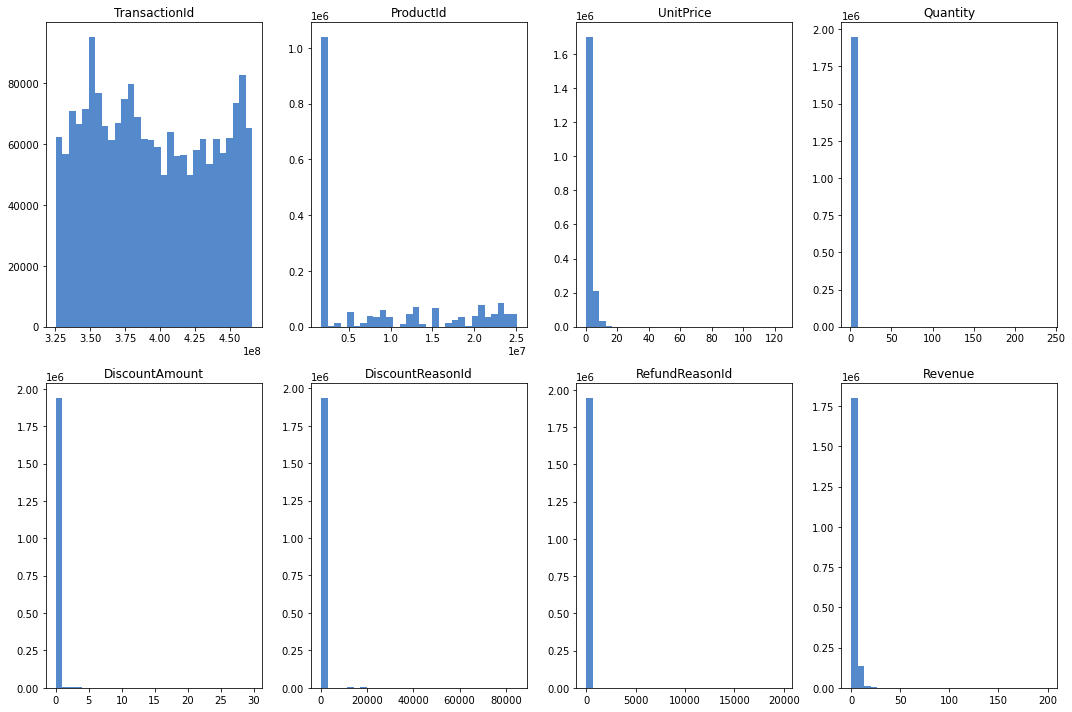

In [33]:
plt.subplots(2, 4, figsize=(15, 10))

count = 1

for col in combined_num.columns:
    plt.subplot(2, 4, count)
    plt.hist(combined_num[col], bins=30, color= bakery.light_magpie)
    plt.title(col)
    
    count += 1
    
plt.tight_layout()
plt.show()

### Observations 
- There is a range of `ProductId` that appears far more in the dataset than the rest (ID < 500,000)
- The majority of the procuts have a `UnitPrice` under £10
- Most transactions involve purchasing a `Quantity` less than 5 of any one product 
- The majority of transactions have a `DiscountAmount` are below £5 
- `Revenue` per transaction is mostly under £25 

## Exploration into The `Revenue` Change over Time
As one of the models being developed is forecasting product quantities, this column will be reviewed further to identify trends, any seasonal trends or relationships with external datasets such as weather and CPI data. An initial hypothesis about the trends can then be developed and tested in the modelling phase.  

To assess this, the weather and CPI data needs to merged with the `combined_clean` dataset, with the `Date` column set to DateTime and indexed. 

In [34]:
bakery.convert_date(combined_clean)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948616 entries, 0 to 1957097
Data columns (total 11 columns):
 #   Column            Dtype         
---  ------            -----         
 0   TransactionId     int64         
 1   ProductId         int64         
 2   UnitPrice         float64       
 3   Quantity          int64         
 4   DiscountAmount    float64       
 5   DiscountReasonId  float64       
 6   RefundReasonId    float64       
 7   Date              datetime64[ns]
 8   Revenue           float64       
 9   ShopId            object        
 10  Name              object        
dtypes: datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 178.4+ MB


None

## Monthly Total Revenue Over Time
To assess the general trend of revenue over time, the sum of the monthly revenue will be plotted to see how it has changed over the last 2 years. A copy of the data is made a stored to `combined_monthly`, which will have the data resampled to be on a monthly basis. 

In [35]:
combined_monthly = combined_clean.copy()
combined_monthly = combined_monthly.set_index('Date').copy()

# Resampling the index to be on a montly scale so the total revenue each month can be plotted
combined_monthly = combined_monthly.resample('MS').sum()

In [36]:
# add lines for each column
fig = px.line(combined_monthly, x=combined_monthly.index, y=combined_monthly['Revenue'])

# axis labels and title
fig.update_layout(
    yaxis_title='Revenue £', 
    title='There is an Upwards Trend in Total Monthly Revenue'
)

# activate slider
fig.update_xaxes(rangeslider_visible=True)

fig.show()

From the above graph there is a very clear upwards trend in revenue over the two years, and a distinct seasonal trend, with the peak revenue being in the summer months and dips in the winter months. To assess further, the total revenue per shop will be reviewed to see if this is the case for each shop. 

## Daily Total Revenue Over Time for Each Bakery

In [37]:
# To get the daily level of transactions
combined_by_shop = combined_clean.groupby(['Date','ShopId']).sum().copy()
combined_by_shop

TransactionId   ProductId  UnitPrice  Quantity  \
Date       ShopId                                                   
2020-09-01 ALD      352014195275  8124961171    3139.45      1309   
           DAR      262221263009  6458472177    2264.25       999   
           NOR       77428501468  1545569994     658.15       267   
           SW       275233279571  6811127814    2183.15      1043   
2020-09-02 ALD      340499233717  8415198472    2934.85      1233   
...                          ...         ...        ...       ...   
2022-09-21 SW       289248856809  5474462293    2135.35       750   
2022-09-22 ALD      387675102268  6325917425    2843.85       957   
           DAR      214801932092  3991278170    1579.25       520   
           NOR      227852187251  3969926281    1814.25       518   
           SW       272114110561  4963451814    1961.55       701   

                   DiscountAmount  DiscountReasonId  RefundReasonId  Revenue  
Date       ShopId                                                             
2020-09-01 ALD              24.50          222474.0         39500.0  3703.60  
           DAR               3.60           33139.0         39698.0  2712.05  
           NOR               2.80           19614.0             0.0   727.90  
           SW                1.94           33138.0             0.0  2637.21  
2020-09-02 ALD              13.20          179270.0             0.0  3402.15  
...                           ...               ...             ...      ...  
2022-09-21 SW                4.71          292865.0             0.0  2530.94  
2022-09-22 ALD              20.70          216164.0         19849.0  3221.20  
           DAR               2.60           19614.0         50971.0  1764.60  
           NOR               7.00           39710.0             0.0  1929.85  
           SW                4.22          176115.0             0.0  2320.78  

[2939 rows x 8 columns]

In [38]:
combined_by_shop = combined_by_shop.reset_index()
combined_by_shop = combined_by_shop.set_index('Date')

In [39]:
combined_by_shop

ShopId  TransactionId   ProductId  UnitPrice  Quantity  \
Date                                                                
2020-09-01    ALD   352014195275  8124961171    3139.45      1309   
2020-09-01    DAR   262221263009  6458472177    2264.25       999   
2020-09-01    NOR    77428501468  1545569994     658.15       267   
2020-09-01     SW   275233279571  6811127814    2183.15      1043   
2020-09-02    ALD   340499233717  8415198472    2934.85      1233   
...           ...            ...         ...        ...       ...   
2022-09-21     SW   289248856809  5474462293    2135.35       750   
2022-09-22    ALD   387675102268  6325917425    2843.85       957   
2022-09-22    DAR   214801932092  3991278170    1579.25       520   
2022-09-22    NOR   227852187251  3969926281    1814.25       518   
2022-09-22     SW   272114110561  4963451814    1961.55       701   

            DiscountAmount  DiscountReasonId  RefundReasonId  Revenue  
Date                                                                   
2020-09-01           24.50          222474.0         39500.0  3703.60  
2020-09-01            3.60           33139.0         39698.0  2712.05  
2020-09-01            2.80           19614.0             0.0   727.90  
2020-09-01            1.94           33138.0             0.0  2637.21  
2020-09-02           13.20          179270.0             0.0  3402.15  
...                    ...               ...             ...      ...  
2022-09-21            4.71          292865.0             0.0  2530.94  
2022-09-22           20.70          216164.0         19849.0  3221.20  
2022-09-22            2.60           19614.0         50971.0  1764.60  
2022-09-22            7.00           39710.0             0.0  1929.85  
2022-09-22            4.22          176115.0             0.0  2320.78  

[2939 rows x 9 columns]

In [40]:
# add lines for each column
fig = px.line(combined_by_shop, x=combined_by_shop.index, y=combined_by_shop['Revenue'], color='ShopId')

# axis labels and title
fig.update_layout(
    yaxis_title="Revenue (£)", 
    legend_title="", 
    title="Daily Revenue Across Four Bakeries"
)

# activate slider
fig.update_xaxes(rangeslider_visible=True)

fig.show()

From the above figure, again the general upwards trend of revenue over the two years can be seen. For the bakeries: `Aldeburgh`, `Darsham` and `Southwold` the distinct seasonal trend is also seen. For `Norwich` the seasonal pattern is far weaker. On theory for this is that the locations of shops are different. `Aldeburgh`, `Darsham` and `Southwold` are all located near the seaside, whereas `Norwich` is located in a City, therefore they ones located by the seaside would have a greater seasonal pattern as people visit the beach at different times of the year, compared to a cafe in a City.

However, it is clear that all four shops do have a general upwards trend in revenue and a seasonal pattern. 

---

# Exploration into The Categorical Columns
Next the categorical columns will be reviewed to identify any trends that could lead to insights and areas of exploration in the modelling. 

In [41]:
combined_cat = combined_clean.select_dtypes('object').copy()
combined_cat

ShopId                           Name
0          ALD              AMERICANO REG T/O
1          ALD  ENGLISH BREAKFAST TEA REG T/O
2          ALD      SALTED CARAMEL COOKIE T/O
3          ALD      ENGLISH BREAKFAST TEA E/I
4          ALD              RAINBOW SALAD E/I
...        ...                            ...
1957093    DAR    DOUBLE CHOCOLATE COOKIE T/O
1957094    DAR           COFFEE FINANCIER T/O
1957095    DAR               CHEESE SCONE T/O
1957096    DAR               CHEESE STRAW T/O
1957097    DAR                      DIET COKE

[1948616 rows x 2 columns]

To determine what are the top and bottom 10 selling products overall, the `top_bottom_products` function in usedm which counts the number of transactions per product and returns the top 10 and bottom 10 selling. 

In [42]:
bakery.top_bottom_products(combined_cat, 'all shops')

The top 10 selling products at all shops are: 
SAUSAGE ROLL T/O          76129
FLAT WHITE REG T/O        61404
MAGPIE SOURDOUGH LARGE    56251
CINNAMON SWIRLS T/O       44709
LATTE LARGE T/O           44052
CUSTARD TART T/O          37818
CHEESE STRAW T/O          36434
BAKEWELL T/O              36187
CROISSANT T/O             34894
AMARETTI T/O              33379
Name: Name, dtype: int64

The bottom 10 selling products at all shops are: 
SABLE BISCUIT E/I              1
BLAKENEY SPECIAL CROISS E/I    1
MINI MERINGUES                 1
BUDDHA BOWL E/I                1
BROC PIZZA E/I                 1
CARAMEL CRACKLE 10"            1
^^CHAI LATTE LRG               1
TIRAMISU 10"                   1
VEGAN CHOC CAKE T/O            1
BLACK MAGIC 10"                1
Name: Name, dtype: int64


### Observations
- The top 10 selling products are all Take Out products 
    > - This could be due to the data starting in September 2020, which is only recently post the Covid pandemic and only 3 months after being allowed to eat in cafes again, which could be skewing the results as customers were not as comfortable to sit in cafes 
    > - Another hypothesis 3 our of the 4 bakeries in the dataset are located by the beach, perhaps customers prefer buying their products and eating them on the beach
    > - Further anaylysis into Eat In vs Take Out would be required to determine the reason. However, for this project the focus is on prediciting total sales, regardless on whether they are Eat In or Take Out, this will not be explored in depth for this analysis
- The majority of the top 10 selling prodcuts are products that have been selected for the forecasting model as they are the most difficult to predict. This emphasises the importance and necessity for an accurate forecast as they are the most in demand products, therefore sales and hence revenue could be lost if the forecast is incorrect
- The bottom 10 selling products appear to be either seasonal or retail products (whole cakes) and therefore are likely to have lower sales 

## Analysis into Top and Bottom Selling Products for Each Shop
To confirm the correct top products have been selected for forecasting the top and bottom 10 products will be identified for each shop to ensure that it is not one shop with a larger number of sales skewing the results. 

In [43]:
aldeburgh_clean = combined_clean[combined_clean['ShopId']=='ALD']
southwold_clean = combined_clean[combined_clean['ShopId']=='SW']
darsham_clean = combined_clean[combined_clean['ShopId']=='DAR']
norwich_clean = combined_clean[combined_clean['ShopId']=='NOR']

In [44]:
bakery.top_bottom_products(aldeburgh_clean, 'Aldeburgh')
print('')
bakery.top_bottom_products(southwold_clean, 'Southwold')
print('')
bakery.top_bottom_products(darsham_clean, 'Darsham')
print('')
bakery.top_bottom_products(norwich_clean, 'Norwich')

The top 10 selling products at Aldeburgh are: 
SAUSAGE ROLL T/O          23931
FLAT WHITE REG T/O        23121
MAGPIE SOURDOUGH LARGE    16937
CINNAMON SWIRLS T/O       14285
LATTE LARGE T/O           12442
CROISSANT T/O             12142
CUSTARD TART T/O          11804
LATTE REG T/O             11748
BAKEWELL T/O              11645
AMARETTI T/O              10737
Name: Name, dtype: int64

The bottom 10 selling products at Aldeburgh are: 
ALMOND TOAST X2         1
BARON BIGOD WHEEL       1
VIRGIN BLOODY MARY      1
^^ PAVLOVA              1
VEGAN MOZZARELLA T/O    1
^^ VEG TAGINE           1
BINHAM BLUE             1
PIMMS E/I               1
^^ SPECIAL TEA FOR 2    1
WHOLE CAKE ORDER        1
Name: Name, dtype: int64

The top 10 selling products at Southwold are: 
SAUSAGE ROLL T/O          25013
FLAT WHITE REG T/O        20678
MAGPIE SOURDOUGH LARGE    18473
CINNAMON SWIRLS T/O       15846
LATTE LARGE T/O           15633
CROISSANT T/O             12754
BAKEWELL T/O              12495


### Observations
- The top 10 selling products for `Aldeburgh`, `Southwold` and `Darsham` are all Take Out products 
    > - As these three bakeries are located by the seaside, this strengthens the hypothesis that customers are purchasing take away products to enjoy on the beach 
- `Norwich` has the majority of the top 10 selling products as Eat In. This is most likely due to it being located in a City, therefore people prefer to sit down and have a coffee inside than taking it away 
- The majority of the top 10 selling prodcuts across all the shops are products that have been selected for the forecasting model, validating that they have been selected correctly to forecast
- The bottom 10 selling products across all shops appear to be either seasonal or retail products (whole cakes) and therefore are likely to have lower sales 
- All shops seem appear to have the same product preferences so can be assumed to have similar customers with similar demands. 

# Part 2 : EDA on The Revenue Against Independent Variables
Now .....**UPDATE**

As it appears from the inital EDA that all the shops behave quite similarly (they have the same seasonal and upwards trend, and the majority of the same top and bottom selling products) for the remainder of the EDA the total quantity and total revenue will be explored.

## Importing Total Revenue Dataset

In [45]:
total_rev = pd.read_csv('total_revenue.csv', index_col=0)
total_rev.index = pd.to_datetime(total_rev.index)
display(total_rev.head())

Total_Revenue  ALD_Revenue  DAR_Revenue  SW_Revenue  NOR_Revenue  \
2020-09-01        9780.76      3703.60      2712.05     2637.21       727.90   
2020-09-02       10037.55      3402.15      2567.60     3218.85       848.95   
2020-09-03        9419.30      3060.50      2538.35     2883.05       937.40   
2020-09-04       10606.15      3516.55      3467.45     2683.75       938.40   
2020-09-05       12922.00      4086.45      3481.97     4153.63      1199.95   

                Day  TAVG  PRCP  CPI_Electricity  CPI_Food  
2020-09-01  Weekday  24.0  0.00            107.6     102.8  
2020-09-02  Weekday  27.0  0.00            107.6     102.8  
2020-09-03  Weekday  31.0  0.07            107.6     102.8  
2020-09-04  Weekday  27.0  0.08            107.6     102.8  
2020-09-05  Weekend  23.0  0.01            107.6     102.8

# Exploration of `Revenue` Against Independent Variables 
To try and determine which independent variables would be good predictors for forecasting `Revenue`, their correlation and trends with `Revenue` will be explored. 

First to get an initial understanding on whether there is a trend, a `regplot` for each independent variable against `Total_Revenue` will be plotted. 

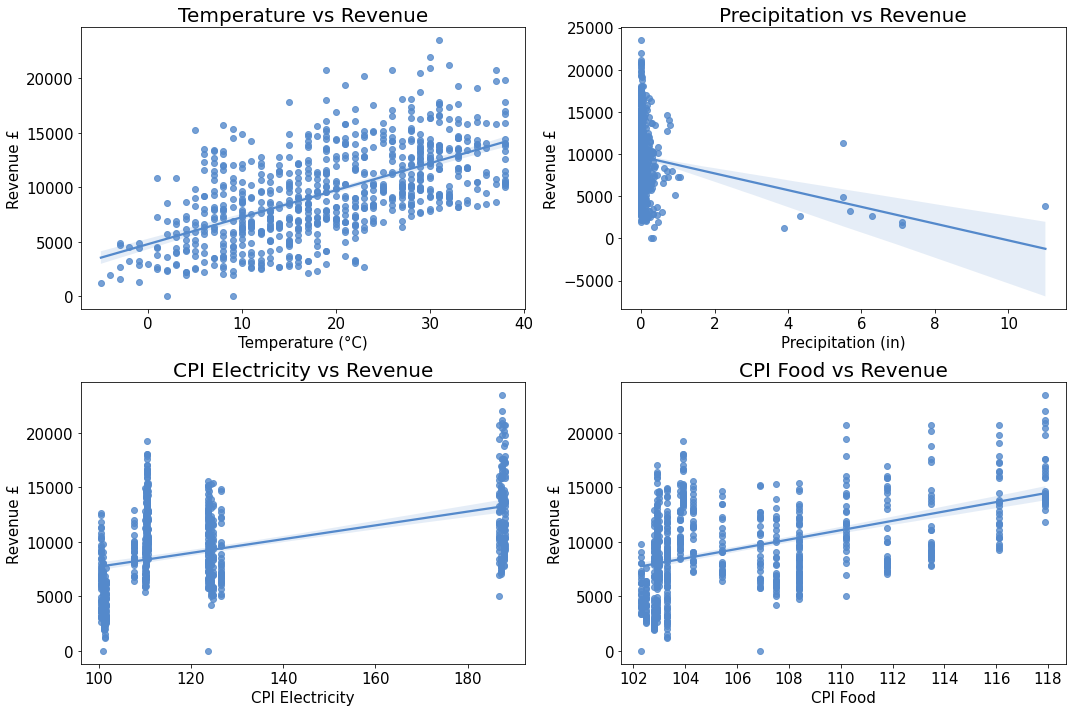

In [46]:
# To plot four regplots, one for each idependent variable against revenue
plt.subplots(2,2, figsize=(15,10))

# Plots average temperature against revenue
plt.subplot(2,2,1)
bakery.plot_regplot(total_rev, 'Total_Revenue', 'TAVG','Temperature vs Revenue', 'Revenue £', 'Temperature (°C)')

# Plots average precipitation against revenue
plt.subplot(2,2,2)
bakery.plot_regplot(total_rev, 'Total_Revenue', 'PRCP','Precipitation vs Revenue', 'Revenue £', 'Precipitation (in)')

# Plots average CPI_Electricity against revenue
plt.subplot(2,2,3)
bakery.plot_regplot(total_rev, 'Total_Revenue', 'CPI_Electricity','CPI Electricity vs Revenue',
             'Revenue £', 'CPI Electricity')

# Plots average CPI_Food against revenue
plt.subplot(2,2,4)
bakery.plot_regplot(total_rev, 'Total_Revenue', 'CPI_Food','CPI Food vs Revenue', 'Revenue £', 'CPI Food')

plt.tight_layout()  # makes sure there is no overlap in plots

plt.show()

### Observations
- There is a strong positive correlation between temperature and revnue
- There is a weak negative correlation between precipitation and revenue 
- There is a weak positive correaltion between CPI electricity and revenue 
- There is a positive correlation between CPI food and revenue 

To further understand these correlations and quantify them, a heat map of the pearsons correlation between revenue and each independent variable is plotted. 

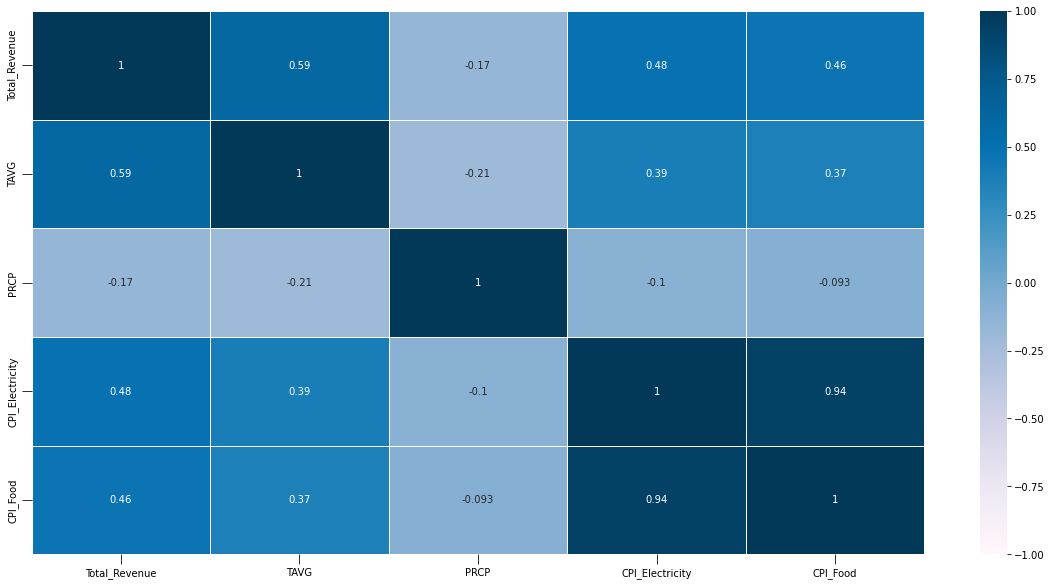

In [47]:
plt.figure(figsize=(20,10))
sns.heatmap(total_rev.drop(columns=['ALD_Revenue', 'SW_Revenue', 'DAR_Revenue', 'NOR_Revenue']).corr(),
            cmap='PuBu',vmin=-1, vmax=1, annot=True, lw=1)
plt.tick_params(size=10)
plt.show()

### Observations
- The strongest correlation with total revenue is the average temperature. This seems reasonable as it is known that most the bakeries are located by the seaside and people generally prefer going to the seaside when the weather is warmer 
- CPI electricity and CPI food have a reasonable correlation with the total revenue. However, they are extremely correlated to each other, therefore one of the variables would have to be excluded from any modelling to reduce multicollinearity
- Precipitation has little to no correlation with the total revenue, therefore it is unlikely that revenue is dependent on precipitation levels

To further explore the relationship, line graphs will be plotted to show the change in revenue over time against each of these independent variables. For this the index will be resampled to show the sum of the monthly revenue against average temperature, precipitation and CPI values. For this the dataset has to be split into two so the revenue can be summed and the independent variables can have the mean calculated. These two dataframe will then be concatonated back together. 

In [48]:
total_rev_only = total_rev[['ALD_Revenue', 'SW_Revenue', 'DAR_Revenue', 'NOR_Revenue', 'Total_Revenue']].copy()
independent_variables = total_rev[['Day', 'TAVG', 'PRCP', 'CPI_Electricity', 'CPI_Food']].copy()

In [49]:
# To resample the revenue to show the sum of revenue for each month 
total_rev_only = total_rev_only.resample('MS').sum()
# to resample the independent variables to show the mean for each month
independent_variables = independent_variables.resample('MS').mean()

In [50]:
total_rev_monthly = pd.concat([total_rev_only, independent_variables], axis=1)
total_rev_monthly

ALD_Revenue  SW_Revenue  DAR_Revenue   NOR_Revenue  Total_Revenue  \
2020-09-01    94876.530   76651.740     75876.33  23910.330000  271314.930000   
2020-10-01    94691.550   74050.670     72479.38  26163.650000  267385.250000   
2020-11-01    47663.890   44885.210     37359.39  13726.640000  143635.130000   
2020-12-01    53413.650   51819.420     44770.70  23141.955556  173145.725556   
2021-01-01    34256.730   30056.630     24201.38   6693.244444   95207.984444   
2021-02-01    32386.480   28616.800     25783.02   9215.000000   96001.300000   
2021-03-01    45609.570   39488.150     38289.77  14052.950000  137440.440000   
2021-04-01    85049.280   73464.980     66991.20  21912.070000  247417.530000   
2021-05-01   101466.020   86977.720     85255.44  25300.610000  298999.790000   
2021-06-01   114731.410   87876.220     90339.24  28915.890000  321862.760000   
2021-07-01   133705.550  111160.210    112863.89  40314.360000  398044.010000   
2021-08-01   151254.320  127671.640    141774.01  47421.030000  468121.000000   
2021-09-01   110773.240   93965.700     87782.86  44409.370000  336931.170000   
2021-10-01   113106.990   91561.450     89907.93  52197.870000  346774.240000   
2021-11-01    85484.540   72812.320     69270.98  51345.500000  278913.340000   
2021-12-01    81287.410   72459.360     71392.74  60288.975000  285428.485000   
2022-01-01    75475.400   70089.930     68021.96  51483.550000  265070.840000   
2022-02-01    68801.500   68707.070     61473.56  49754.900000  248737.030000   
2022-03-01    85289.510   70002.850     63236.21  48021.780000  266550.350000   
2022-04-01   121365.010   99859.140     84550.74  59909.240000  365684.130000   
2022-05-01   105618.780   85637.630     80318.25  61215.160000  332789.820000   
2022-06-01   117500.010   91757.920     82998.93  59005.620000  351262.480000   
2022-07-01   131810.620  119493.830    106114.60  65558.370000  422977.420000   
2022-08-01   164320.270  141546.030    119922.33  70605.930000  496394.560000   
2022-09-01   114319.315   92945.615     76705.27  66521.225000  350491.425000   

                 TAVG      PRCP  CPI_Electricity  CPI_Food  
2020-09-01  26.300000  0.077667            107.6     102.8  
2020-10-01  19.064516  0.142581            100.6     102.9  
2020-11-01  15.533333  0.054000            100.5     102.9  
2020-12-01   9.064516  0.144516            100.9     102.3  
2021-01-01   5.290323  0.107742            101.1     102.8  
2021-02-01   8.821429  1.853214            101.4     103.3  
2021-03-01  11.741935  0.040645            101.5     102.5  
2021-04-01  10.600000  0.002333            110.1     103.3  
2021-05-01  18.161290  0.091935            110.2     103.0  
2021-06-01  28.800000  0.055667            110.3     103.3  
2021-07-01  30.838710  0.055161            110.5     102.9  
2021-08-01  28.870968  0.025484            110.4     103.9  
2021-09-01  29.133333  0.016667            110.6     103.8  
2021-10-01  21.064516  0.299355            123.7     104.3  
2021-11-01  12.900000  0.035000            123.9     105.4  
2021-12-01  11.354839  0.085484            123.8     106.9  
2022-01-01   7.838710  0.014194            124.3     107.5  
2022-02-01  11.678571  0.080000            124.8     108.4  
2022-03-01  13.322581  0.034516            126.6     108.4  
2022-04-01  15.900000  0.019333            186.7     110.2  
2022-05-01  23.451613  0.042903            187.3     111.8  
2022-06-01  27.900000  0.061667            187.8     113.5  
2022-07-01  33.193548  0.003871            188.1     116.1  
2022-08-01  34.322581  0.006452            187.4     117.9  
2022-09-01  26.133333  0.043000              NaN       NaN

In [51]:
bakery.plot_rev_lines(total_rev_monthly, 'TAVG', 'There is a Strong Correlation Between Revenue and Avg Temperature',
               'Average Temperature (°C)')

bakery.plot_rev_lines(total_rev_monthly, 'PRCP', 'There is a Weak Correlation Between Revenue and Precipitation',
               'Average Precipitation (in)')

bakery.plot_rev_lines(total_rev_monthly, 'CPI_Electricity',
               'There is Some Correlation Between Revenue and CPI Electricity', 'CPI Electricity')

bakery.plot_rev_lines(total_rev_monthly, 'CPI_Food',
               'There is Some Correlation Between Revenue and CPI Food', 'CPI Food')

## Oberservations
- Temperature has the greatest correlation to total revenue, with the trend lines being practically on top of each other. This suggests that temperature could be a good predictor for total revenue forecasting.
- Precipitation has a weak correlation to total revenue, so would be a poor predictor of total revenue.
- Both CPI Electricity and CPI Food have a strong correlation to total revenue post January 2022, however are poorly correlated before then. 

Therefore, for the modelling phase of this project, the average daily temperature will be taken forward as an external variable to see if it is a good predictor for revenue forecasting. 

## Exploring the Day Against Revenue
To determine whether a model such as Prophet is required or whether ARIMA is sufficient, the type of day (e.g. weekday, weekend, bank holiday etc) will be plotted against the total revenue to determine if there is a correlation. 

First the average revenue will be determined for each `Day`, by taking a copy of the dataset called `special_dates_rev`. The data will then be grouped by the `Day` column and the mean taken. 

In [52]:
special_dates_rev = total_rev[['Day', 'Total_Revenue']].copy()
special_dates_rev = round(special_dates_rev.groupby('Day').mean(),2)
special_dates_rev.sort_values('Total_Revenue', ascending=False)

Total_Revenue
Day                          
Bank Holiday         13865.68
Closed - BH          12724.14
School Holiday       12045.26
Weekend              11284.08
Weekday               7541.42
Closed - Xmas            0.00

It is evident from the above table that `Bank Holiday` and `School Holiday` days bring in the most revenue on average compared to non-school holidays. In addition to this, it can be seen that `Weekend` days bring in more revenue than `Weekday` days. To further visualise this trend, the revenue by `Day` is plotted as a scatterplot below. 

In [53]:
# Plotting a scatter plot of total revenue over time with a different colour for each day type 
fig = px.scatter(total_rev, x=total_rev.index, y=total_rev['Total_Revenue'], color='Day')

# To add axis labels and title
fig.update_layout(
    yaxis_title='Revenue (£)', 
    xaxis_title = 'Date',
    legend_title='', 
    title='Daily Revenue by Day Type'
)

# To sactivate slider
fig.update_xaxes(rangeslider_visible=True)

fig.show()

## Observations
From the above table showing the mean revenue for each `Day` type and the scatter plot, it is evident that the type of day has an affect on the revenue being made. Therefore, it can be concluded that Prophet modelling could be a suitable option. 

# Part 3 : EDA on The Product Trends 
The top products identified below were selected by the business as they are known to be the most in demand (validated above in the exploration into the category columns) and the most difficult to predict the number of sales. Therefore, developing an accurate forecasting model is essential as to not lose potential sales. 

The steps taken in this analysis are summarised in the below flow chart. 

**FLOW CHART**

First an exploration into their sales over time will be assessed, to identify if there are any trends or seasonal patterns. 

## Importing Quantity Dataset

In [54]:
total_quantity = pd.read_csv(working_directory+'/4_processed_data/total_quantity_processed.csv', index_col=0)
total_quantity.index = pd.to_datetime(total_quantity.index)
display(total_quantity.head())

Almond Toast  Baguette  Bakewell  Cheese & Tomato Melt  \
2020-09-01          13.0      65.0      87.0                  12.0   
2020-09-02          13.0      63.0      75.0                   9.0   
2020-09-03          40.0      59.0      67.0                   5.0   
2020-09-04           1.0      54.0      70.0                   6.0   
2020-09-05          13.0      94.0      84.0                  13.0   

            Cheese Scone  Cheese Straw  Cinnamon Swirl  Coffee  Croissant  \
2020-09-01          52.0         118.0           119.0   681.0      102.0   
2020-09-02          62.0          58.0           122.0   687.0       22.0   
2020-09-03          56.0          80.0           115.0   667.0      136.0   
2020-09-04          55.0          74.0           114.0   748.0      121.0   
2020-09-05          61.0         124.0           119.0   825.0      152.0   

            Croque Monsieur  ...  Magpie Sourdough  Moroccan Vegan Roll  \
2020-09-01             20.0  ...             104.0                 59.0   
2020-09-02             11.0  ...             108.0                 83.0   
2020-09-03             11.0  ...              96.0                 51.0   
2020-09-04             20.0  ...             132.0                 54.0   
2020-09-05             13.0  ...             114.0                106.0   

            Pain Au Chocolate  Sausage Roll    Tea      Day  TAVG  PRCP  \
2020-09-01               99.0         211.0   82.0  Weekday  24.0  0.00   
2020-09-02               87.0         225.0  103.0  Weekday  27.0  0.00   
2020-09-03              110.0         191.0   93.0  Weekday  31.0  0.07   
2020-09-04               98.0         193.0  114.0  Weekday  27.0  0.08   
2020-09-05               98.0         272.0  129.0  Weekend  23.0  0.01   

            CPI_Electricity  CPI_Food  
2020-09-01            107.6     102.8  
2020-09-02            107.6     102.8  
2020-09-03            107.6     102.8  
2020-09-04            107.6     102.8  
2020-09-05            107.6     102.8  

[5 rows x 25 columns]

In [55]:
# A new copy of the dataset is made with only the product columns 
product_df_daily = total_quantity.drop(columns=['Day', 'TAVG', 'PRCP', 'CPI_Electricity', 'CPI_Food']).copy()
product_df = product_df_daily.resample('MS').sum()

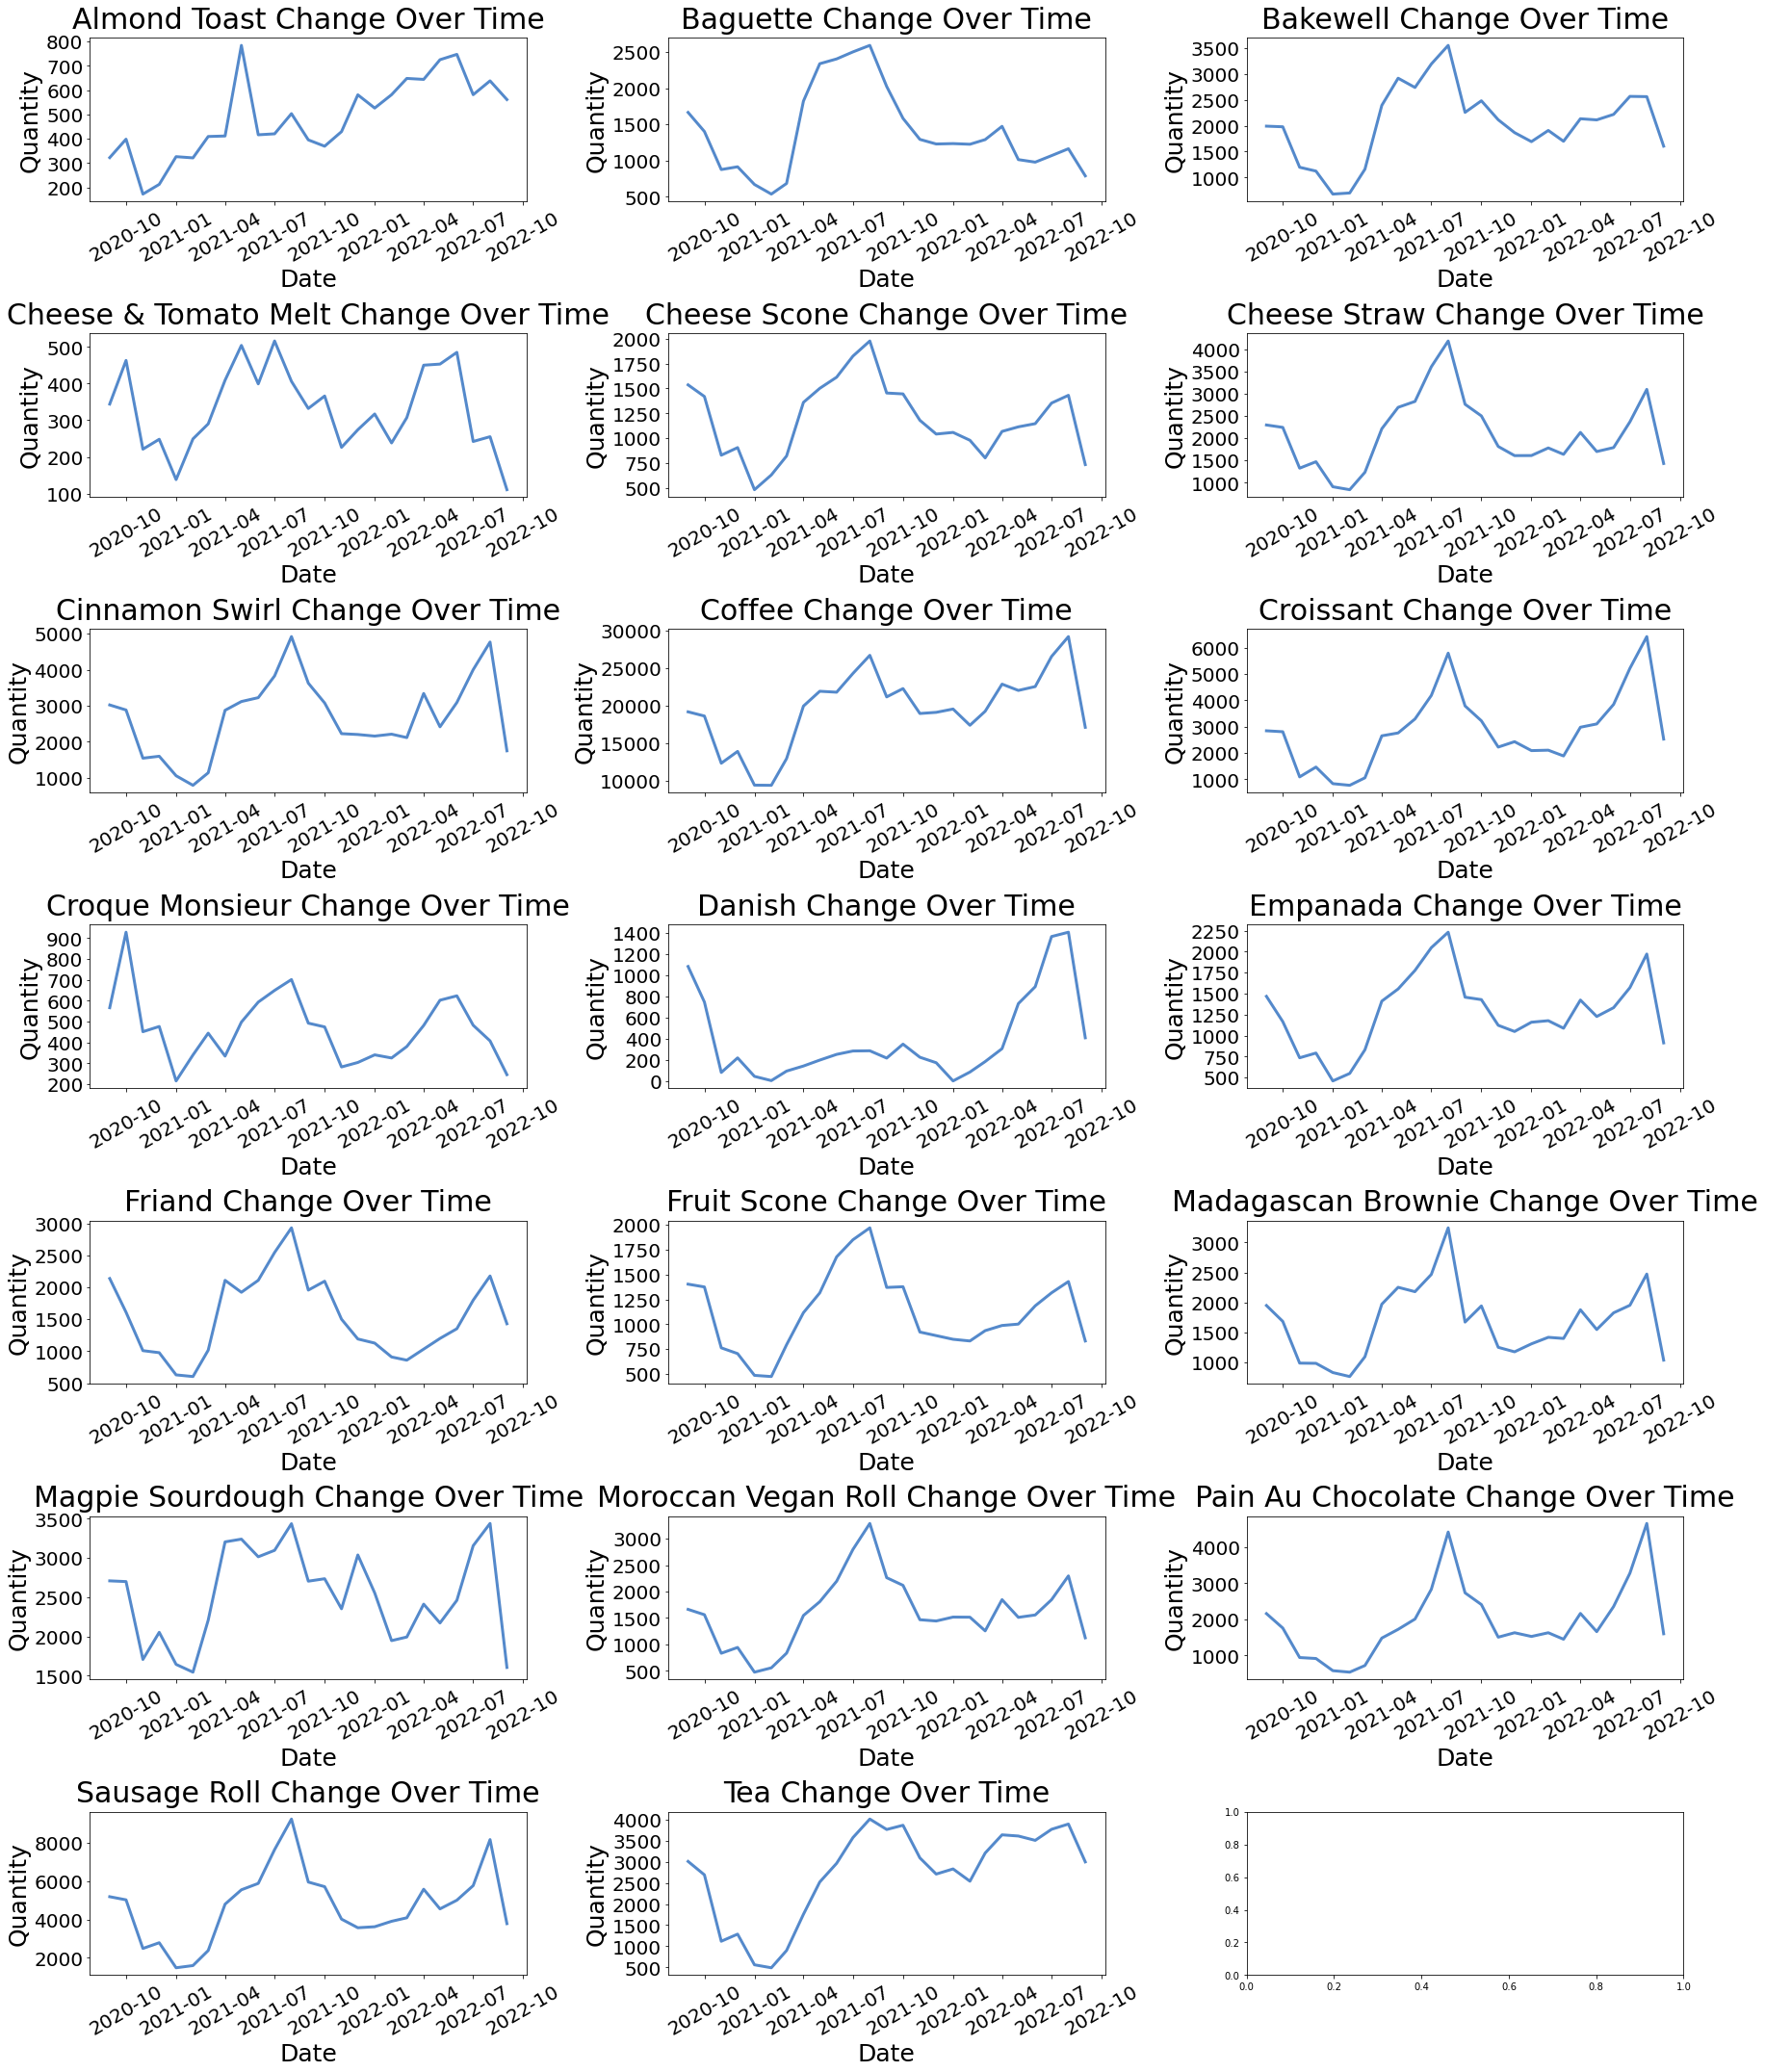

In [56]:
# Loop through column names and plot line plots for monthly sales over time for each product

plt.subplots(7,3, figsize=(25,30))

for i, product in enumerate(product_df.columns):
    plt.subplot(7,3,i+1)
    sns.lineplot(data = product_df, 
                 x=product_df.index, y=product_df[product], color = bakery.light_magpie, linewidth=3)
    
    plt.title(f'{product} Change Over Time', fontsize=30,pad=10)
    plt.ylabel('Quantity', fontsize=25)
    plt.xlabel('Date', fontsize=25)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20, rotation=30)
    plt.tight_layout()
    
plt.show()

## Observations 
- The majority of the products show the same upward and seasonal trend as the overall revenue and quantity of sales 
- `Danish` and `Baguette` products appear to have a less similar pattern. Speaking with owner this is due to them not always being stocked as consistently as the demand is unknown 

As it is known that `TAVG` has a strong correlation with total sales, this will be plotted against the total sales of each product over time to see if the correlation is consistent for all products or certain ones. This will be important to determine for prior to the modelling phase, so it can be determined whether to be included or not for the forecasts of individual products. 

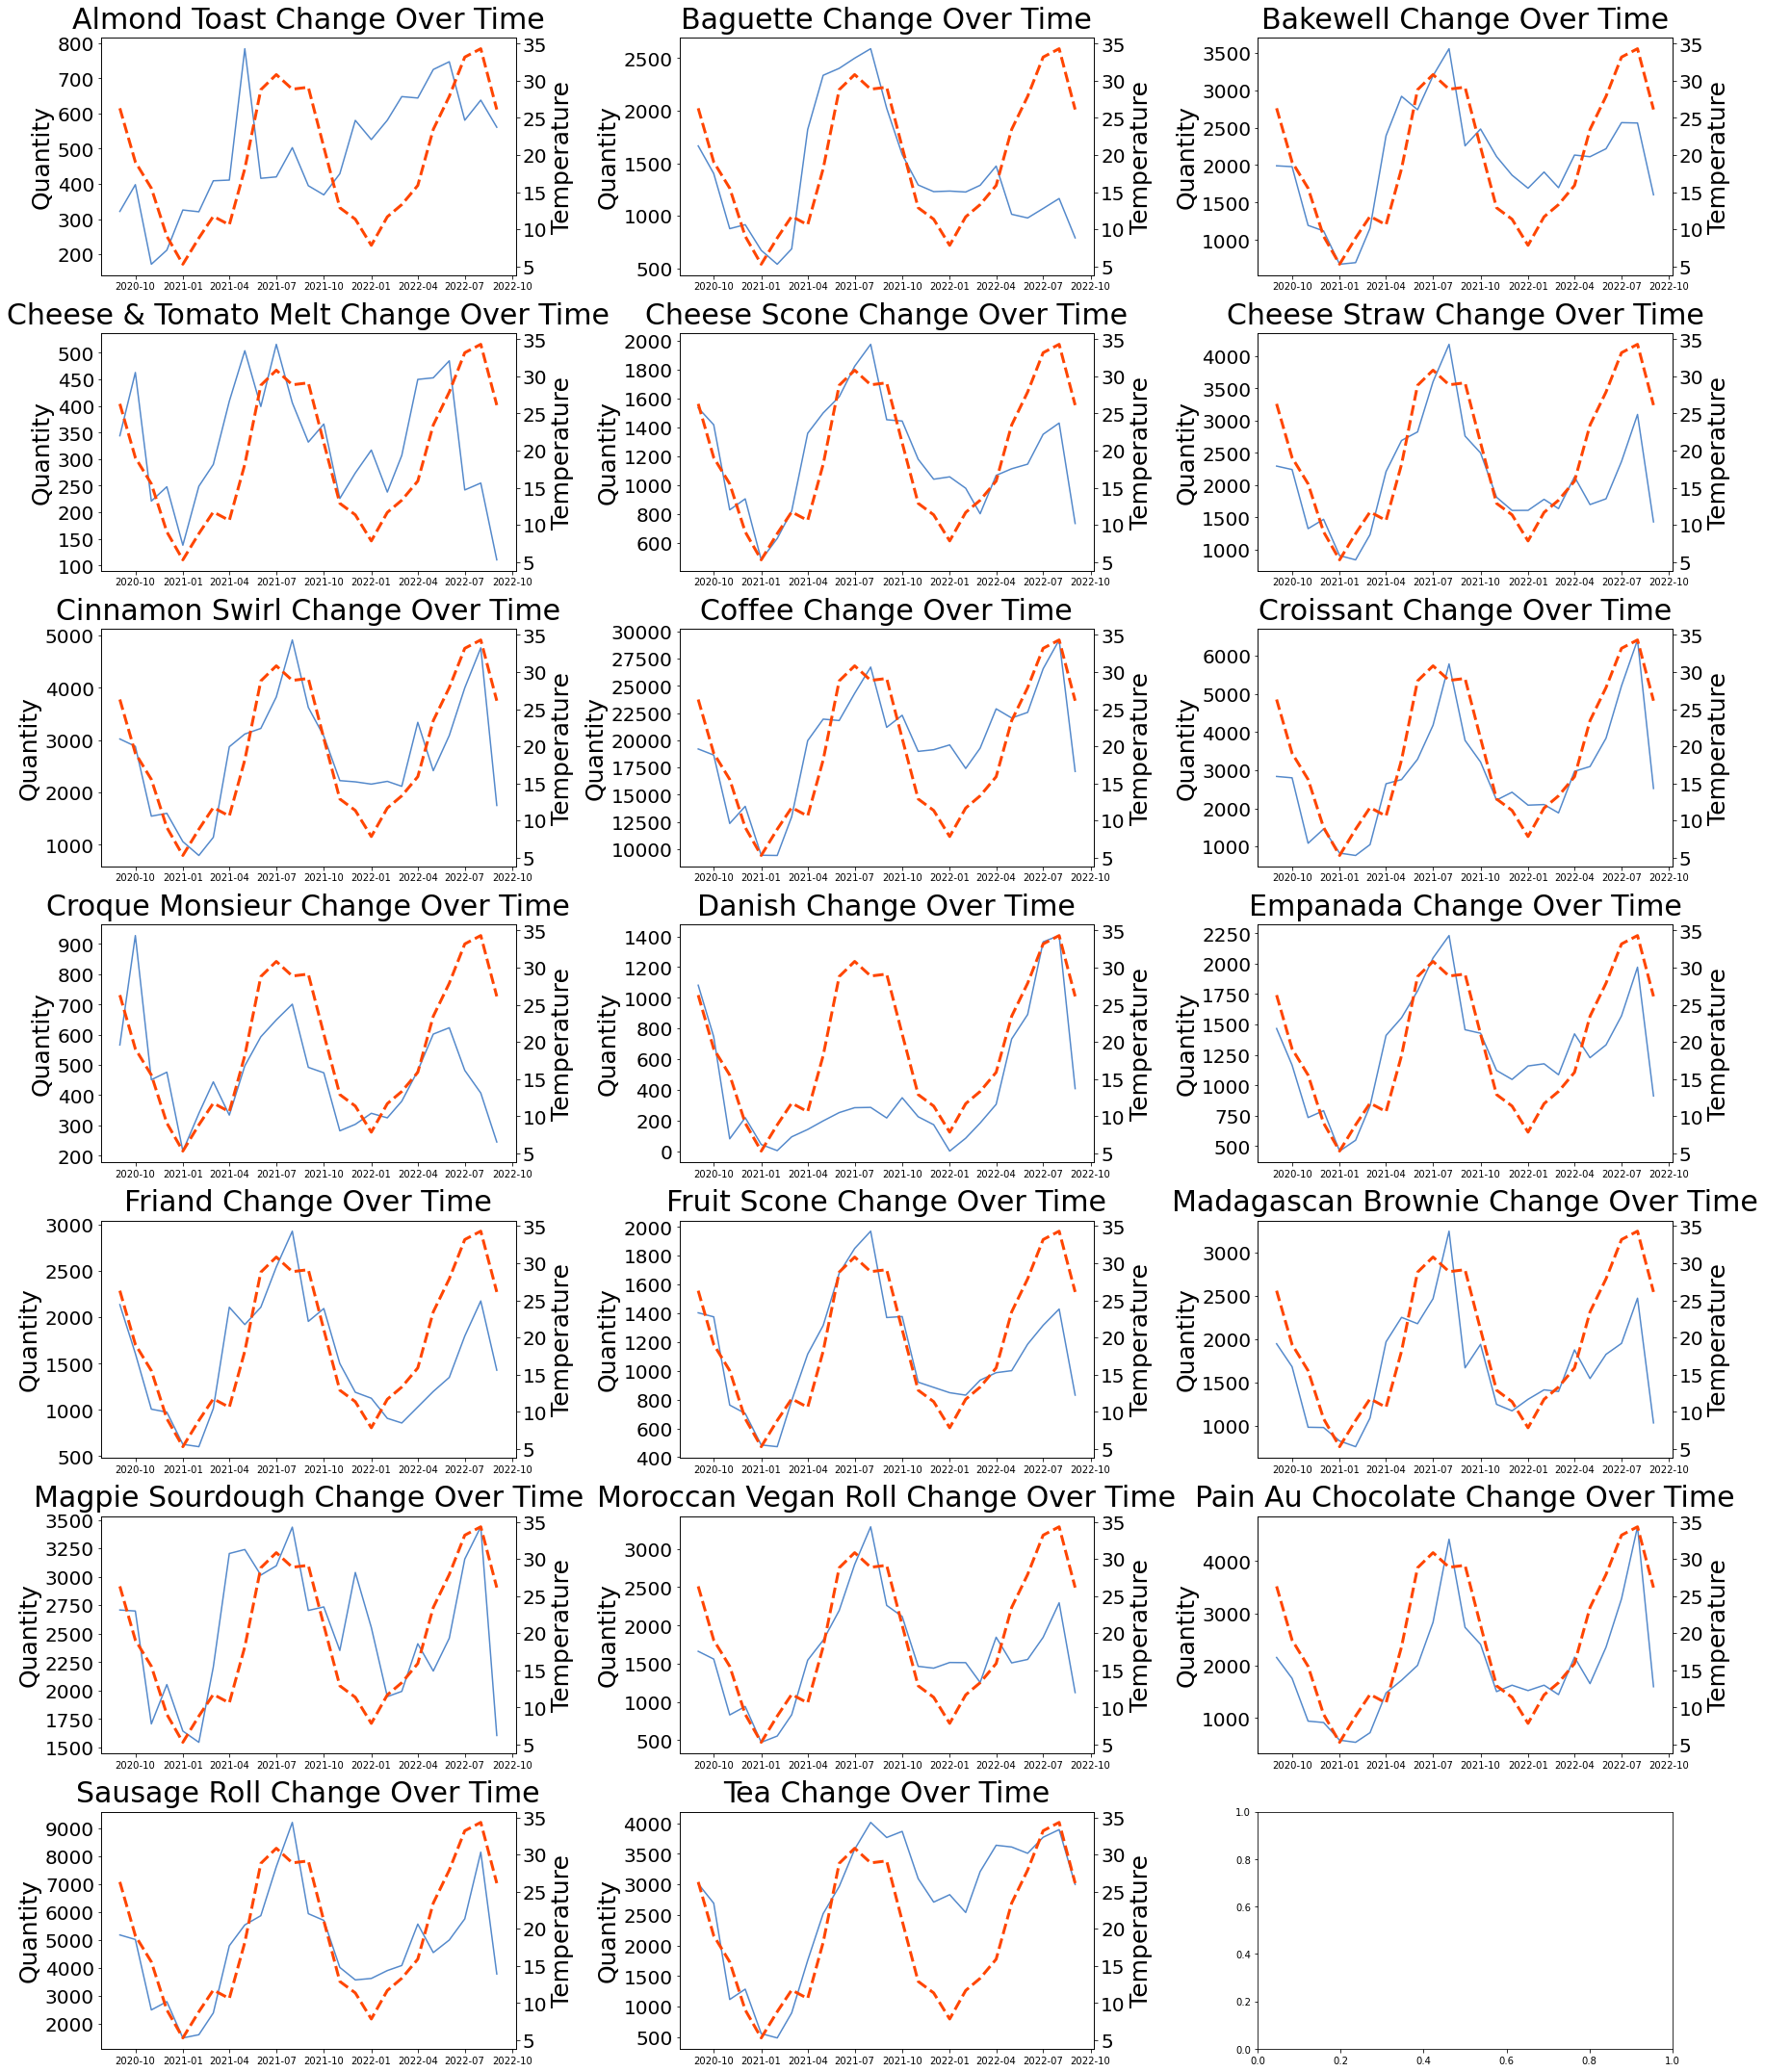

In [57]:
# Loop through column names and plot line plots for monthly sales over time for each product agaisnt TAVG
plt.subplots(7,3, figsize=(25,30))

for i, product in enumerate(product_df.columns):
    plt.subplot(7,3,i+1)
    sns.lineplot(data = product_df, 
                 x=product_df.index, y=product_df[product], color = bakery.light_magpie)
    plt.ylabel('Quantity', fontsize=25)
    plt.yticks(fontsize=20)
    
    ax2 = plt.twinx()
    sns.lineplot(data=total_rev_monthly, x = total_rev_monthly.index, y=total_rev_monthly['TAVG'], ax=ax2,
                color='orangered', linewidth=3, linestyle='--')
    
    plt.title(f'{product} Change Over Time', fontsize=30,pad=10)
    plt.ylabel('Temperature', fontsize=25)
    plt.xlabel('Date', fontsize=25)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20, rotation=30)
    plt.tight_layout()
    
plt.show()

## Observations
- The majority of the products follow the same patter as the `TAVG` line, except for `Tea`, `Friands`, `Almond Toast`, `Danish` and `Cheese and Tomato Melt` products. Therefore, in the modelling phase `TAVG` may not be a useful predictor of total sales. 

To validate this theory and the fact that `PRCP`, `CPI_Electricity` and `CPI_Food` are weaker indicators of individual product sales, a correlation matrix is plotted.

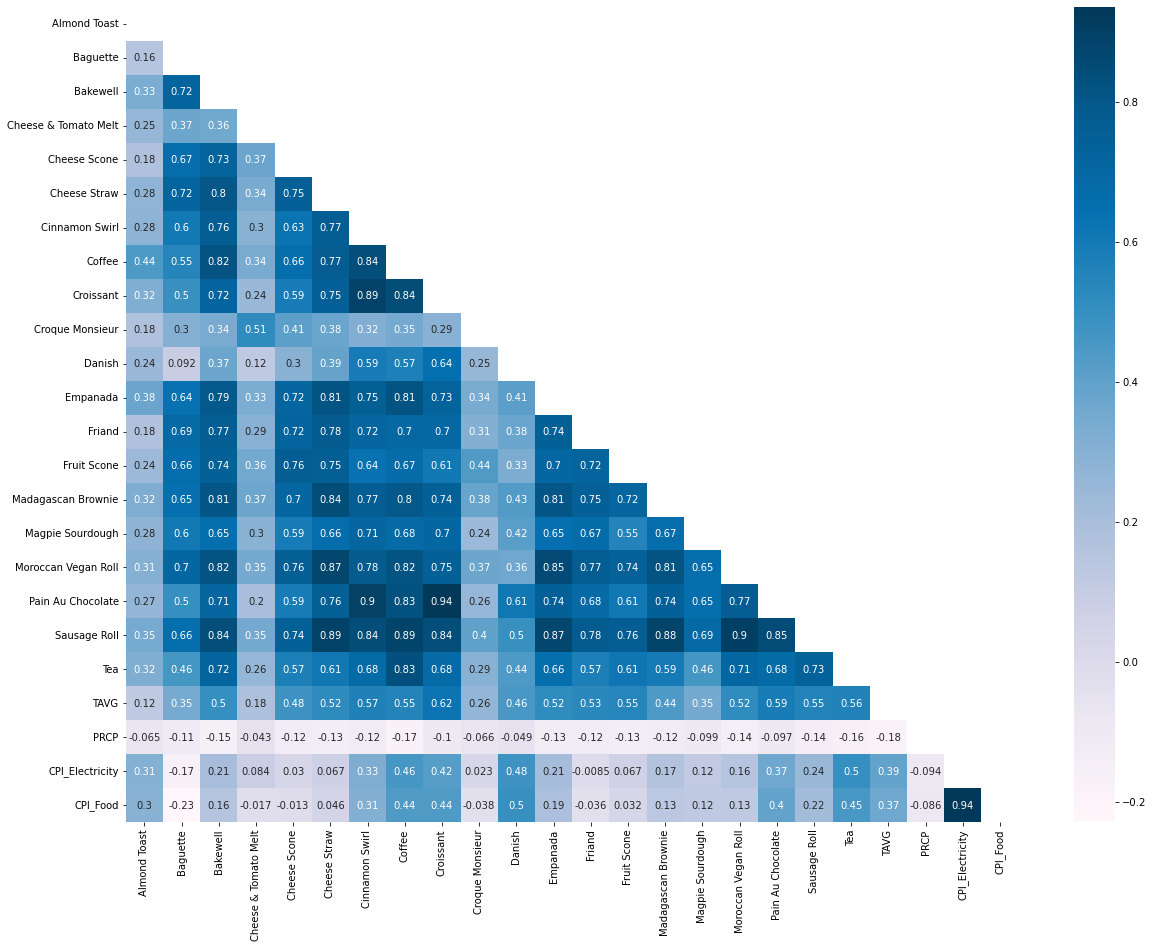

In [58]:
# plotting the correlation matrix using a heatmap 
corr = total_quantity.corr()
plt.figure(figsize=(20,15))
matrix = np.triu(total_quantity.corr())
sns.heatmap(corr, annot=True, mask=matrix, cmap='PuBu')
plt.show()

## Observations
- `PRCP`, `CPI_Electricity` and `CPI_Food` all have weak correlations with the individual products so are less likely to be good predictors of sales 
- `TAVG` has a relatively strong correlation with a about half of the products and a weak one with the other half. Therefore, `TAVG` should only be included in the models where it has a stronger correlation 
- `Coffee` is strong correlated with most of the products, suggesting they could be purchased together 
- `Tea` has a strong correlation to some of the products, such as `Bakewell`, `Sausage Roll`, `Moroccan Vegan Roll` and `Pain Au Chocolate` however it is a weaker correlation than `Coffee` with these products, suggesting `Coffee` is chosen in preference to `Tea`

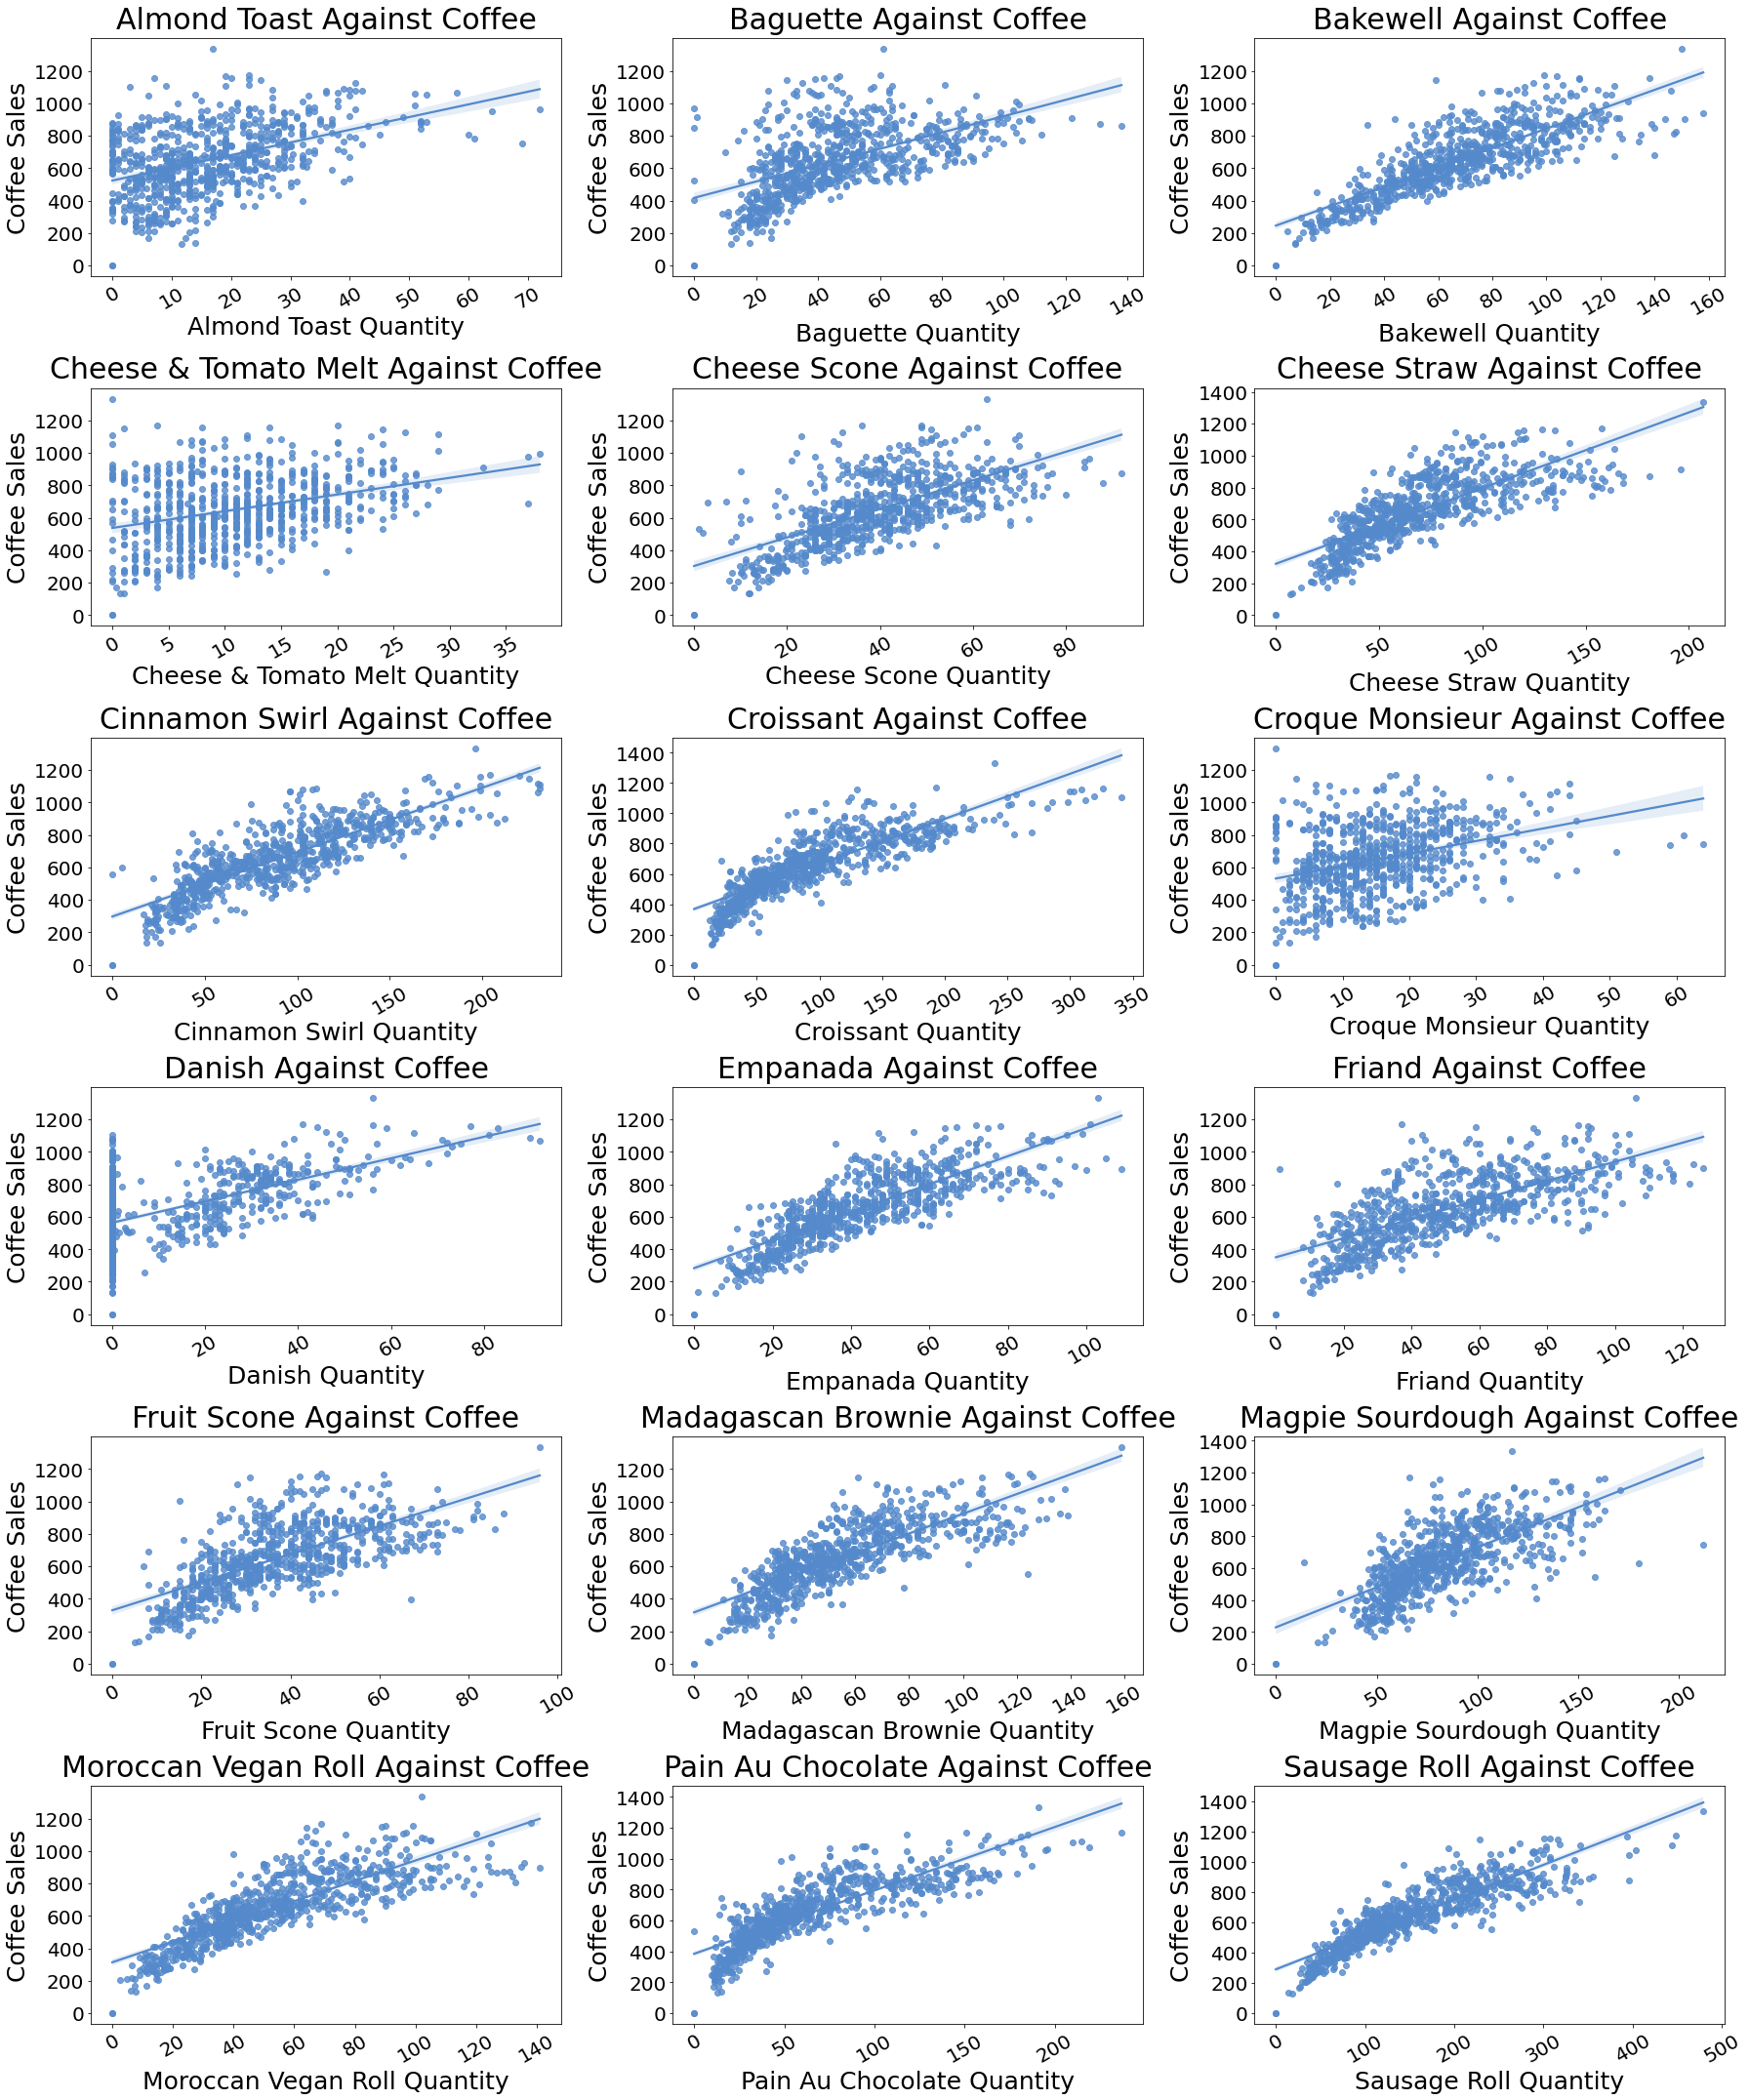

In [59]:
# Loop through column names 
plt.subplots(6,3, figsize=(25,30))

for i, product in enumerate(product_df_daily.columns.drop(['Coffee', 'Tea'])):
    plt.subplot(6,3,i+1)
    sns.regplot(data = product_df_daily, 
                 x=product_df_daily[product], y=product_df_daily['Coffee'], color = bakery.light_magpie)
    plt.ylabel('Coffee Sales', fontsize=25)
    plt.yticks(fontsize=20)
    plt.title(f'{product} Against Coffee', fontsize=30,pad=10)
    plt.xlabel(f'{product} Quantity', fontsize=25)
    plt.xticks(fontsize=20, rotation=30)
    plt.tight_layout()
    
plt.show()

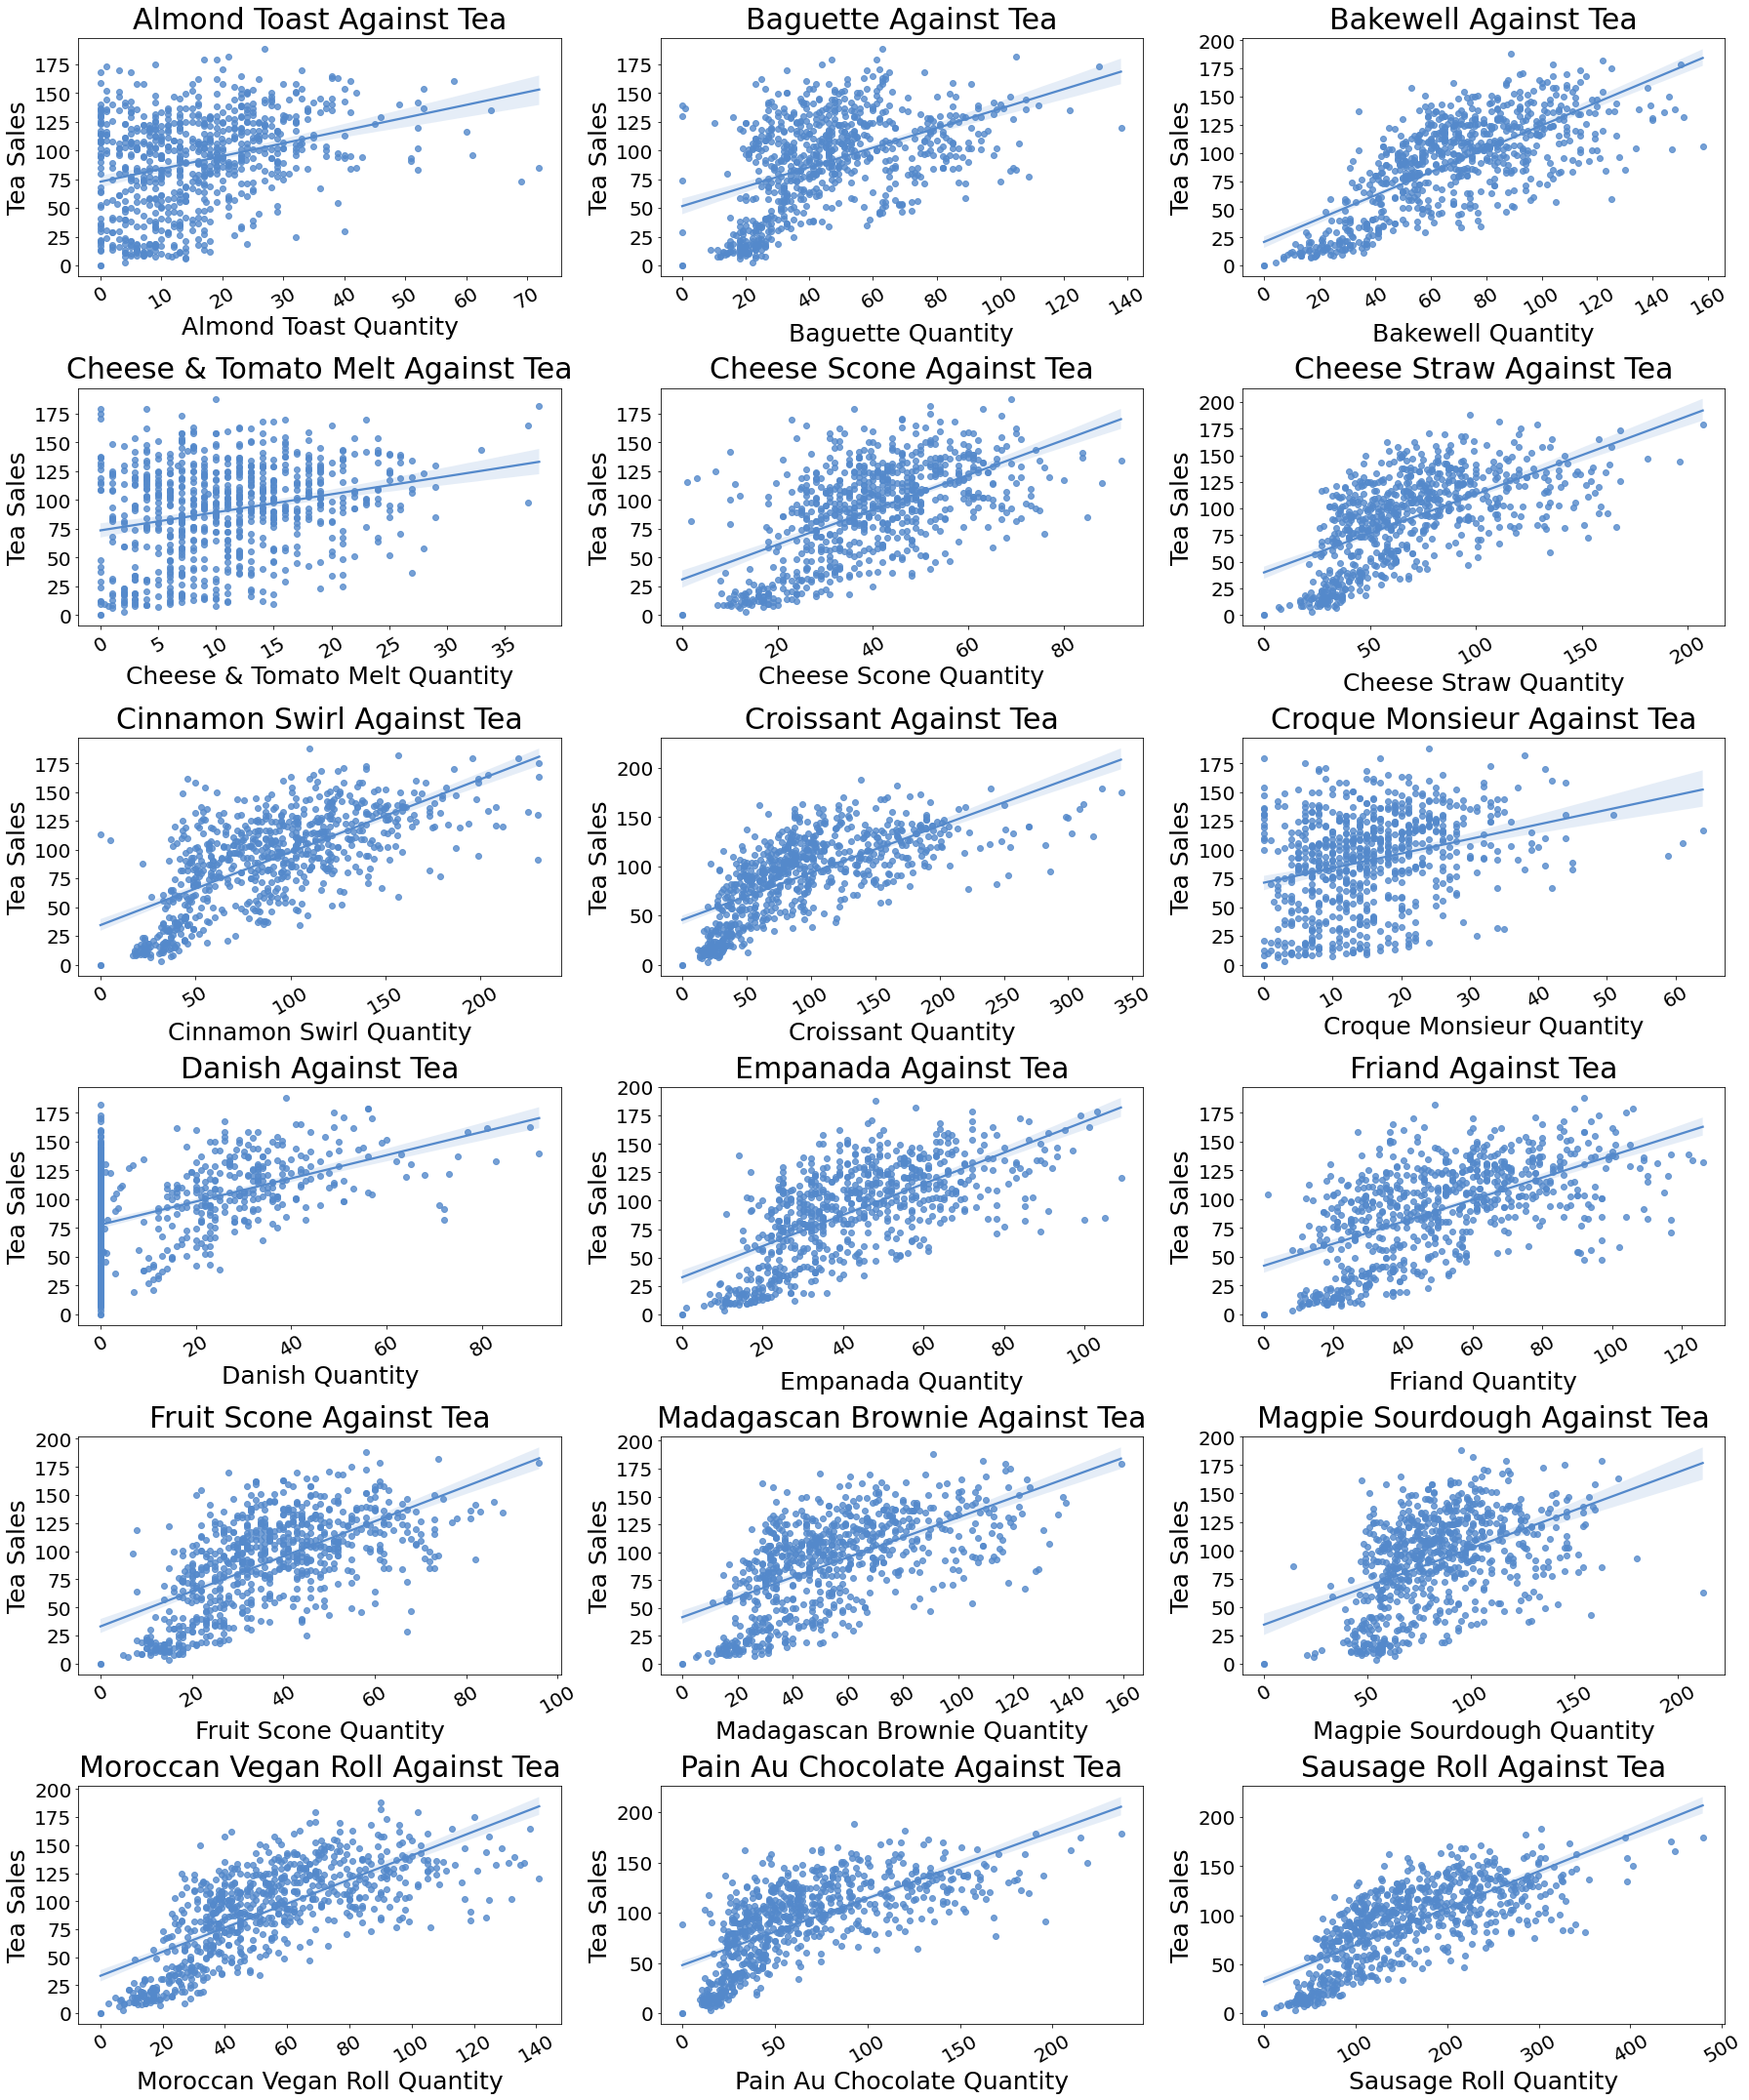

In [60]:
# Loop through column names 
plt.subplots(6,3, figsize=(25,30))

for i, product in enumerate(product_df_daily.columns.drop(['Coffee', 'Tea'])):
    plt.subplot(6,3,i+1)
    sns.regplot(data = product_df_daily, 
                 x=product_df_daily[product], y=product_df_daily['Tea'], color = bakery.light_magpie)
    plt.ylabel('Tea Sales', fontsize=25)
    plt.yticks(fontsize=20)
    plt.title(f'{product} Against Tea', fontsize=30,pad=10)
    plt.xlabel(f'{product} Quantity', fontsize=25)
    plt.xticks(fontsize=20, rotation=30)
    plt.tight_layout()
    
plt.show()

# Summary of Analysis

- Observations 
- Hypothesis
- Therefore MVP model is just rev over time, then products over time, then add T. 

# EDA on Product Names Shop and Total Over Time

- Histogram of each product 
- do 20 plots to show products change over time 
- Show against T, P, CPI CPI, Day 
- Do corr plot
- futher regplot for products highly correlated 
- by shop and total 
- pearsons test 
- pair plot 
- plot top product by shop? Or table of top 5 across shops
- plot all against tea and coffee reg plot - identify products bought together 
- hypothesis